<center>
<h1>Intelligent Data Analysis Project</h1>
<h4>Matej Bebej (50%), Marian Kurcina (50%)</h4>
</center>

## Table of Contents
Assignment    
Phase 1 - Exploratory Data Analysis
- 1.1 - Basic description of data and their characteristics
  - A - Data structure analysis
      - Observation
      - Patient
      - Station
  - B - Analysis of individual attributes
  - C - Paiwise data analysis
      - Observation
      - Patient
      - Station
  - D - Potential predictors
  - E - Observations
- 1.2 - Identification of problems, data integration, and cleaning
  - A - Data problems
  - B - Data accuracy check
  - C - Outlier detection
- 1.3 - Formulation and statistical verification of hypotheses about the data
  - A - Hypotheses
      - Hypothesis 1 -
      - Hypothesis 2 -
  - B - Statistical power
      - Hypothesis 1 -
      - Hypothesis 2 - 
Conclusion
<br><br><br>

# Assignment

Oxygen saturation is a key indicator of the proper functioning of the respiratory and circulatory systems. When its value drops to a critically low level, it may indicate life-threatening conditions such as hypoxemia, respiratory failure, or severe infections. In such cases, immediate intervention is essential. Traditional monitoring is performed using pulse oximeters, which, however, can be affected by noise, motion artifacts, or may have limitations in certain clinical situations.

Modern machine learning–based approaches offer the possibility to estimate and predict critical oxygen saturation values with higher accuracy (critical oxygen saturation estimation). Models can utilize multimodal data, such as heart rate, respiratory rate, blood pressure, or sensor signals. By being trained on diverse datasets, it is possible to identify early warning signs of desaturation, filter out noise, and provide timely alerts even before oxygen saturation drops below a safe threshold.

The goal of this assignment is to become familiar with the issue of oxygen saturation monitoring, understand the contribution of artificial intelligence, and design a solution that could improve critical care and reduce risks associated with undiagnosed hypoxemia.

Each pair of students will work with an assigned dataset starting from Week 2. Your task is to predict the dependent variable “oximetry” (the predicted variable) using machine learning methods. In doing so, you will need to deal with various issues present in the data, such as inconsistent formats, missing values, outliers, and others.

The expected outcomes of the project are:

 - the best-performing machine learning model, and

 - a data pipeline for building it from the input data.

# Phase 1 – Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import re
from scipy.stats import normaltest
import dateparser
observation = pd.read_csv("dataset/observation.csv", sep='\t')
patient = pd.read_csv("dataset/patient.csv", sep='\t')
station = pd.read_csv("dataset/station.csv", sep='\t')

## 1.1 - Basic description of data and their characteristics

### A - Data structure analysis

Analyze file structures and relationships (number, types, etc.), records (structure, number of records, number of attributes, types, etc.).

<br>

#### Observation

In [2]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12107 non-null  float64
 1   HR                     12107 non-null  float64
 2   PI                     12107 non-null  float64
 3   RR                     12107 non-null  float64
 4   EtCO₂                  12107 non-null  float64
 5   FiO₂                   12107 non-null  float64
 6   PRV                    12107 non-null  float64
 7   BP                     12107 non-null  float64
 8   Skin Temperature       12107 non-null  float64
 9   Motion/Activity index  12107 non-null  float64
 10  PVI                    12107 non-null  float64
 11  Hb level               12107 non-null  float64
 12  SV                     12107 non-null  float64
 13  CO                     12107 non-null  float64
 14  Blood Flow Index       12107 non-null  float64
 15  PP

In [3]:
observation.nunique()

SpO₂                     11928
HR                       11928
PI                       11928
RR                       11928
EtCO₂                    11928
FiO₂                     11928
PRV                      11928
BP                       11928
Skin Temperature         11928
Motion/Activity index    11928
PVI                      11928
Hb level                 11928
SV                       11928
CO                       11928
Blood Flow Index         11928
PPG waveform features    11928
Signal Quality Index     11928
Respiratory effort       11928
O₂ extraction ratio      11928
SNR                      11928
oximetry                     2
latitude                   519
longitude                  519
dtype: int64

From following output, we can deduce that the dataset "observation" includes:    
- 12107 entries (rows)    
- 23 atributes (columns)

The dataset contains following attributes for each record:

SpO₂, HR, PI, RR, EtCO₂, FiO₂, PRV, BP, Skin Temperature, Motion/Activity index, PVI, Hb level, SV, CO, Blood Flow Index,PPG waveform features, Signal Quality Index, Respiratory effort, O₂ extraction ratio, SNR, oximetry, latitude, longitude

There are no attributes with null values, all attributes are float type.

<br>

#### Patient

In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   residence         0 non-null      float64
 1   current_location  2022 non-null   object 
 2   blood_group       2128 non-null   object 
 3   job               638 non-null    object 
 4   mail              2128 non-null   object 
 5   user_id           2128 non-null   int64  
 6   birthdate         1170 non-null   object 
 7   company           2128 non-null   object 
 8   name              2128 non-null   object 
 9   username          2128 non-null   object 
 10  ssn               2128 non-null   object 
 11  registration      2128 non-null   object 
 12  station_ID        2128 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.3+ KB


In [5]:
patient.isnull().sum()

residence           2128
current_location     106
blood_group            0
job                 1490
mail                   0
user_id                0
birthdate            958
company                0
name                   0
username               0
ssn                    0
registration           0
station_ID             0
dtype: int64

In [6]:
patient.nunique()

residence              0
current_location    2022
blood_group            8
job                  402
mail                2121
user_id             1379
birthdate           1150
company             1934
name                2073
username            2100
ssn                 2128
registration        1918
station_ID           719
dtype: int64

From following output, we can deduce that the dataset "patient" includes:    
- 2128 entries (rows)    
- 13 atributes (columns)

The dataset contains following attributes for records:

residence, current_location, blood_group, job, mail, user_id, birthdate, company, name, username, ssn, registration, station_ID

There are several attributes with null values:
- residence - this attribute is not needed since it contains no non-null values
- current_location - this attribute has 106 null values
- job - this attribute has 1490 null values
- birthday - this attribute has 958 null values

residence is float type.
current_location, blood_group, job, mail, birthdate, company, name, username, ssn, registration are object type.
user_id, station_ID are int type

<br>

#### Station

In [7]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   772 non-null    object 
 1   code       770 non-null    object 
 2   revision   772 non-null    object 
 3   station    772 non-null    object 
 4   latitude   772 non-null    float64
 5   longitude  772 non-null    float64
dtypes: float64(2), object(4)
memory usage: 36.3+ KB


In [8]:
station.isnull().sum()

location     0
code         2
revision     0
station      0
latitude     0
longitude    0
dtype: int64

In [9]:
station.nunique()

location     135
code          94
revision     760
station      519
latitude     519
longitude    519
dtype: int64

From following output, we can deduce that the dataset "station" includes:    
- 772 entries (rows)    
- 6 atributes (columns)

The dataset contains following attributes for records:

location, code, revision, station, latitude, longtitude

There is only one attribute which cntains null values:
- code - this attribute has 2 null values

location, code, revision, station is object type.
latitude, longtitude are float type.

---

<br><br><br>

### B - Analysis of individual attributes

For at least 10 selected significant attributes, analyze their distributions and basic descriptive statistics, and check whether they meet the required conditions and the expected range of measured values.

<br>

#### Observation

In [10]:
observation.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,...,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000
mean,97.720877,78.139220,9.280387,16.420159,39.761272,61.836198,106.629738,106.142109,35.712456,10.013732,...,4.068934,51.897652,51.293918,50.545308,55.540997,0.249564,29.975732,0.596845,28.671404,9.237063
std,0.849157,4.782149,3.432338,1.287131,1.220140,10.182272,24.520873,3.676340,0.606630,1.009803,...,0.094006,12.439194,11.859092,12.741621,11.301895,0.028901,5.765204,0.490552,23.945771,73.361001
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,6.063736,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-156.474320
25%,97.073862,74.938806,6.543803,15.418921,38.840854,55.076625,90.088136,103.704873,35.307574,9.331576,...,4.021535,43.468302,43.298068,42.100520,47.965348,0.224556,24.960719,0.000000,14.420440,-67.331220
50%,97.850262,78.124134,8.703433,16.493047,39.782823,61.853122,106.339196,106.122106,35.711898,10.012485,...,4.041752,51.983722,51.298702,50.436869,55.588062,0.249187,30.054808,1.000000,36.246240,8.881040
75%,98.359154,81.345487,12.159623,17.466124,40.708415,68.679155,123.256573,108.536922,36.114306,10.698413,...,4.081694,60.322630,59.309318,59.247765,63.116464,0.274669,34.948440,1.000000,46.518720,71.211690
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,14.205771,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,65.933810,168.313660


|Attribute Name|Description|Mean (Average)|Standard Deviation| Minimum| Maximum| Q1|Q2|Q3|Acceptable Range|
|--------------|-----------|--------------|------------------|--------|--------|---|--|--|----------------|
|SpO₂|Peripheral oxygen saturation|97.720877|0.849157|95|100|97.073862|97.850262|98.359154|95-100%|
|HR|Heart rate from pulse oximeter|78.139220|4.782149|60|100|74.938806|78.124134|81.345487|60-100bpm|
|PI|Perfusion index|9.280387|3.432338|0.2|20|6.543803|8.703433|12.159623|0.2-20%|
|RR|Respiratory rate|16.420159|1.287131|12|20|15.418921|16.493047|17.466124|12-20 breaths/min|
|EtCO₂|End-tidal carbon dioxide|39.761272|1.220140|35|45|38.840854|39.782823|40.708415|35-45 mmHG|
|FiO₂|Fraction of inspired oxygen|61.836198|10.182272|21|100|55.076625|61.853122|68.679155|21-100%|
|PRV|Pulse rate variability|106.629738|24.520873|20|200|90.088136|106.339196|123.256573|20-200ms|
|BP|Blood pressure (systolic diastolic mean)|106.142109|3.676340|90|120|103.704873|106.122106|108.536922|90/60-120/80 mmHg
|Skin Temperature|Peripheral temperature|35.712456|0.606630|33|38|35.307574|35.711898|36.114306|33-38°C|
|Motion/Activity index|Sensor artifact correction|10.013732|1.009803|6.063736|14.205771|9.331576|10.012485|10.698413||
|PVI|Pleth Variability Index|14.946319|1.322060|10|20|14.085887|14.940500|15.813169|10-20%|
|Hb level|Hemoglobin concentration|14.919731|0.818275|12|18|14.369708|14.921914|15.468757|12-18 g/dL|
|SV|Stroke volume|87.122299|3.480042|60|100|84.775740|87.120146|89.443815|60-100 mL/beat|
|CO|Cardiac output|4.068934|0.094006|4|8|4.021535|4.041752|4.081694|4-8 L/min|
|Blood Flow Index|Optical/near-infrared blood flow measurement|51.897652|12.439194|0|100|43.468302|51.983722|60.322630||
|PPG waveform features|Photoplethysmography signal parameters|51.293918|11.859092|0|100|43.298068|51.298702|59.309318||
|Signal Quality Index|Reliability indicator of readings|50.545308|12.741621|0|100|42.100520|50.436869|59.247765|0-100%|
|Respiratory effort|Chest impedance or belt-derived effort|55.540997|11.301895|0|100|47.965348|55.588062|63.116464||
|O₂ extraction ratio|Calculated oxygen extraction metric|0.249564|0.028901|0.2|0.3|0.224556|0.249187|0.274669|0.2-0.3
|SNR|Signal-to-noise ratio from sensor|29.975732|5.765204|20|40|24.960719|30.054808|34.948440|20-40 dB|
|latitude||28.671404|23.945771|-54.8|65.933810|14.420440|36.246240|46.518720|-90°-90°|
|longitude||9.237063|73.361001|-156.474320|168.313660|-67.331220|8.881040|71.211690|-180°-180°|

We can see that all attributes are in accetable range, therefore we can expect that no attributes are inputed incorrectly.
Attribute Oximetry is float type, however it contains only values 0 and 1, therefore we can say it is boolean attribute.

<br>

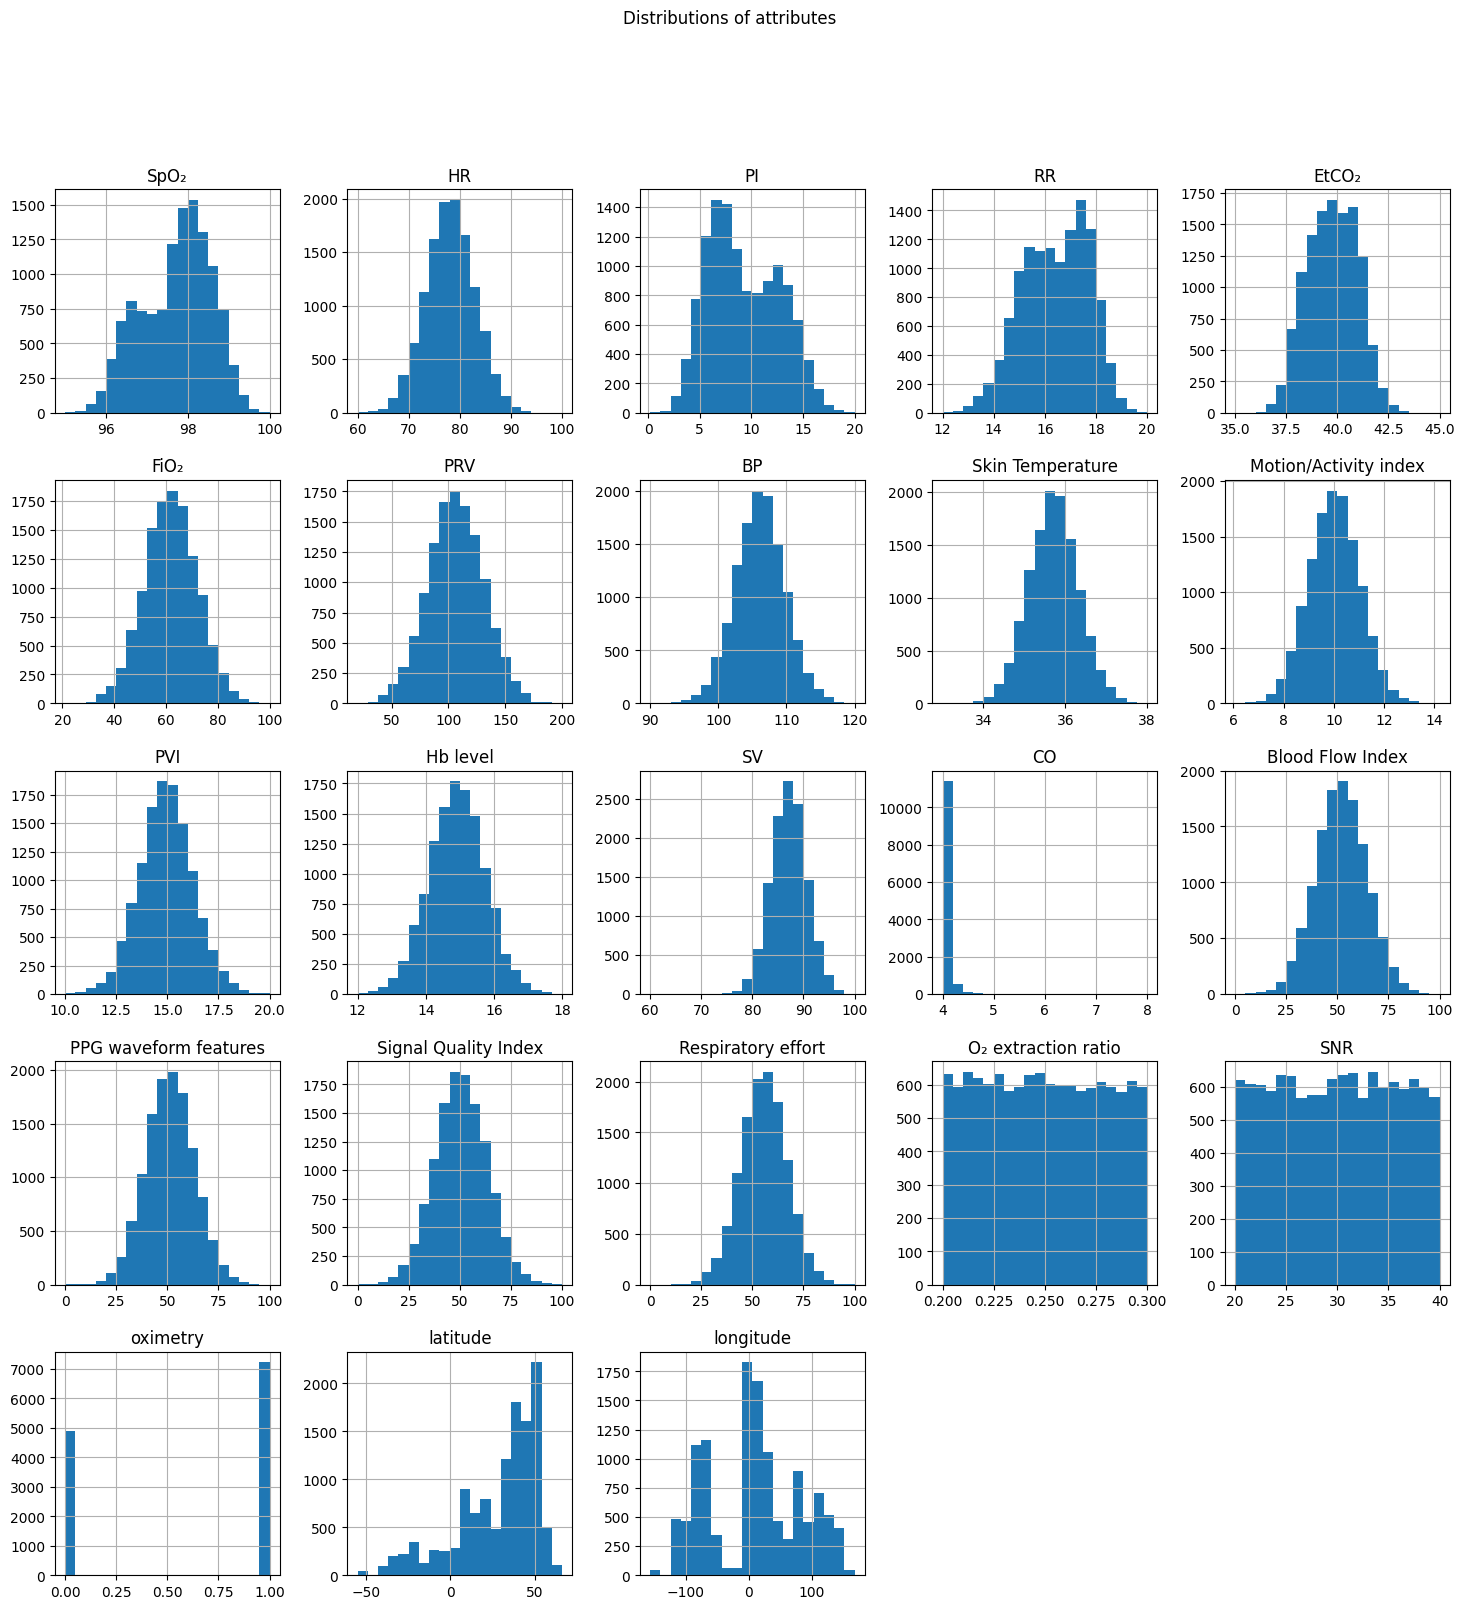

In [11]:
observation.hist(figsize=(18, 18), bins=20)
plt.suptitle("Distributions of attributes")
plt.show()

In [12]:
for col in observation.select_dtypes(include='number').columns:
    data = observation[col].dropna()
    stat, p = normaltest(data)
    print(f"{col}: {p} -> {'normal' if p > 0.05 else 'not normal'},\n {data.skew()} skew,\n {data.kurt()} kurtosis\n")

SpO₂: 1.5363139954530892e-158 -> not normal,
 -0.3371814826310864 skew,
 -0.6530604770313353 kurtosis

HR: 0.9553892210919934 -> normal,
 0.003649593813801721 skew,
 -0.012198051820739408 kurtosis

PI: 0.0 -> not normal,
 0.27027624269939854 skew,
 -0.8719145282774083 kurtosis

RR: 1.6083536221895697e-137 -> not normal,
 -0.24267009668789452 skew,
 -0.6551747223669224 kurtosis

EtCO₂: 1.1616870273859805e-64 -> not normal,
 -0.0351635784741534 skew,
 -0.5429531773823051 kurtosis

FiO₂: 0.6906212807747991 -> normal,
 -0.01904136033613549 skew,
 0.003026216294312878 kurtosis

PRV: 0.207089424253633 -> normal,
 0.009553974743601194 skew,
 -0.07466967971266136 kurtosis

BP: 1.2644694089796055e-05 -> not normal,
 -0.01514828709809658 skew,
 0.23172030878590055 kurtosis

Skin Temperature: 0.39950799138486687 -> normal,
 0.008046092454978062 skew,
 0.0587472318867559 kurtosis

Motion/Activity index: 0.6652781837578627 -> normal,
 0.016548964099385464 skew,
 -0.023477062743010535 kurtosis

PVI:

We can see that attributes with normal distribution are:
- HR
- FiO₂
- PRV
- Skin Temperature
- Motion/Activity index
- Hb level
- Blood Flow Index
- PPG waveform features
- Signal Quality Index
- Respiratory effort

<br>

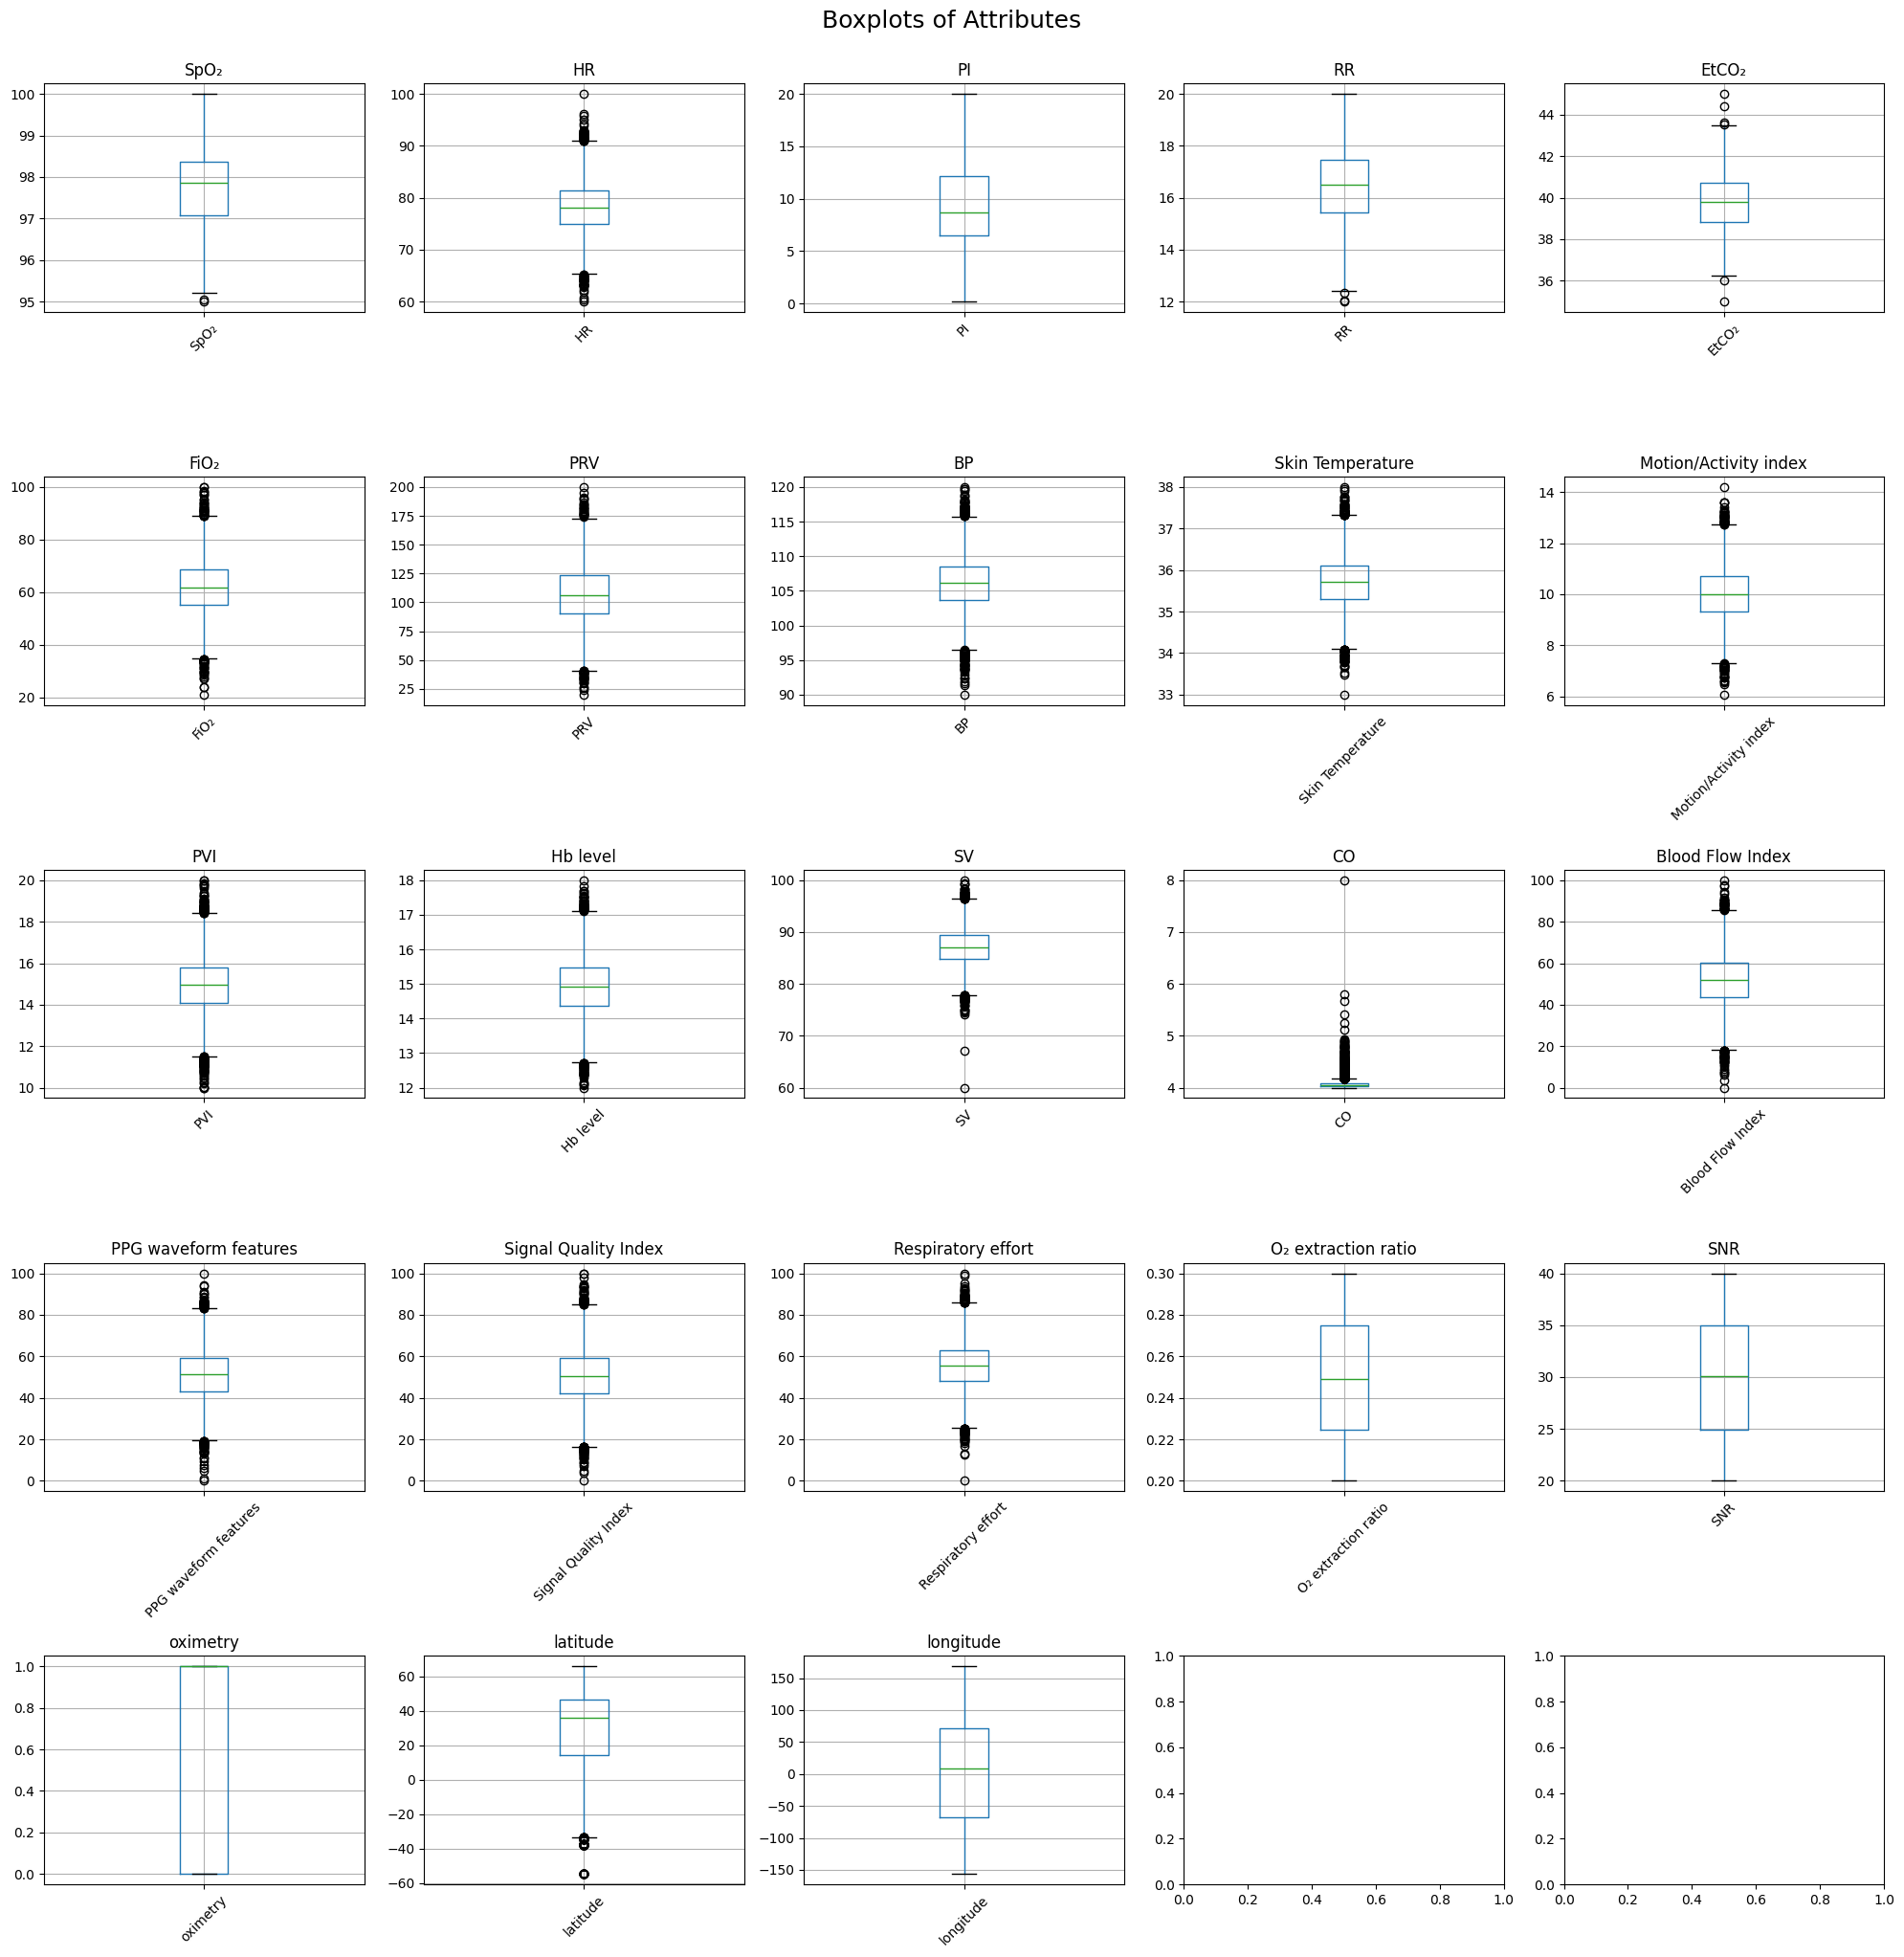

In [13]:
numeric_cols = observation.select_dtypes(include=["float64", "int64"]) #vpodstate vse
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    numeric_cols.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots of Attributes", fontsize=18, y=1.02)
plt.show()

There are some outliers for attributes, but since they are in valid range, we will keep them.

---

<br><br><br>

<br><br>

### C - Pairwise data analysis

Identify relationships and dependencies between pairs of attributes.

<br><br>

In [14]:
#### Observation

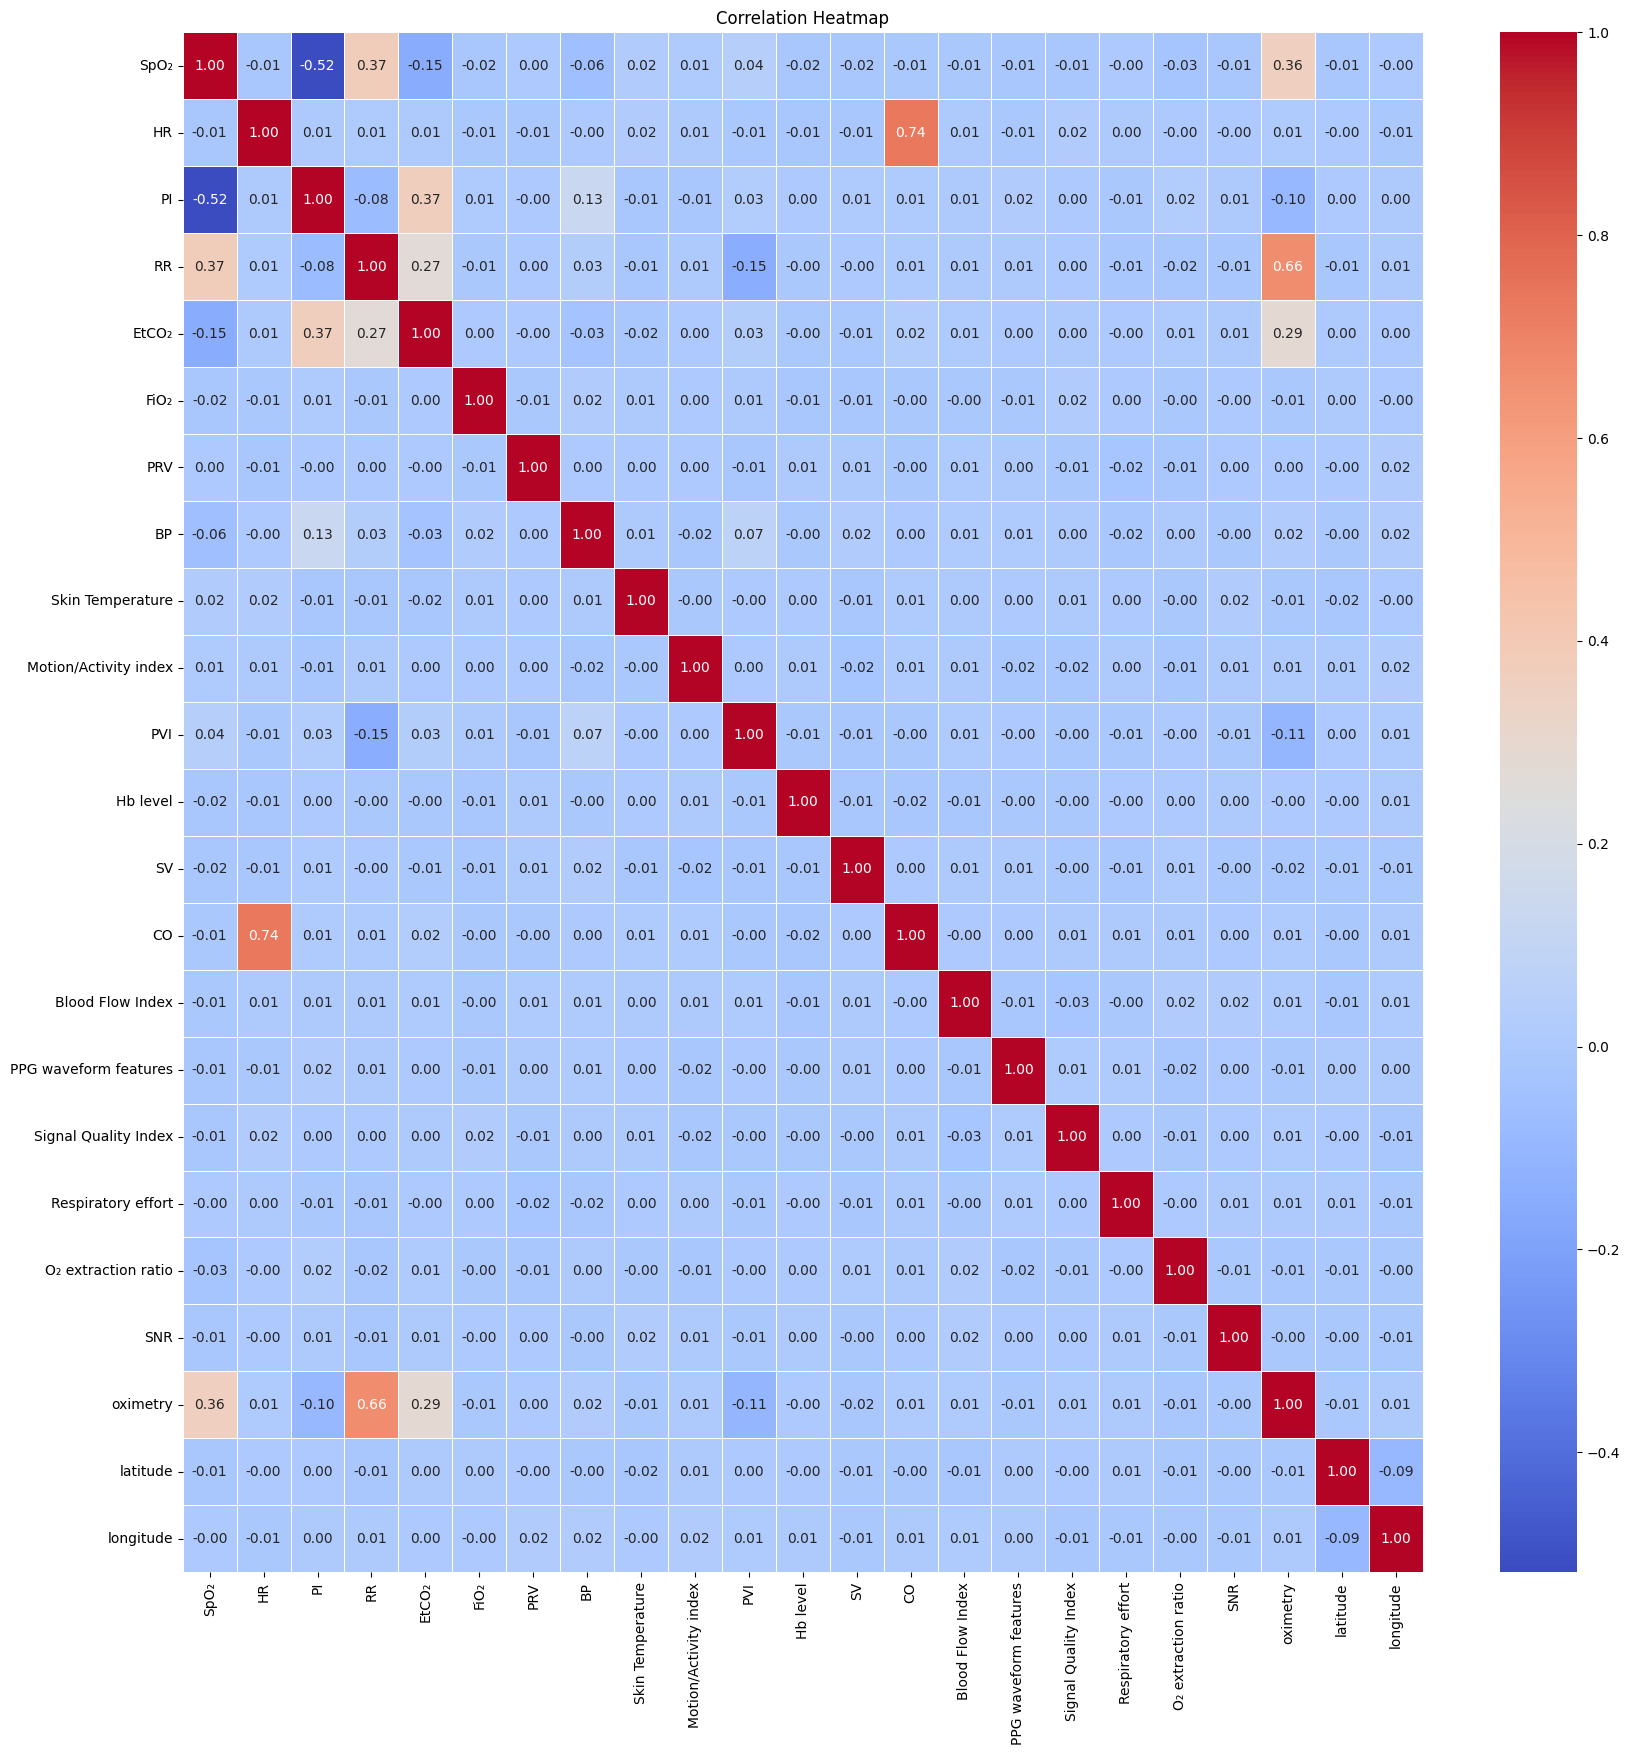

In [15]:
corr = observation.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The resulting heatmap highlights which attributes are most related to each other and to the target variable which is oximetry. We can safely assume which variables may be redundant or highly correlated.

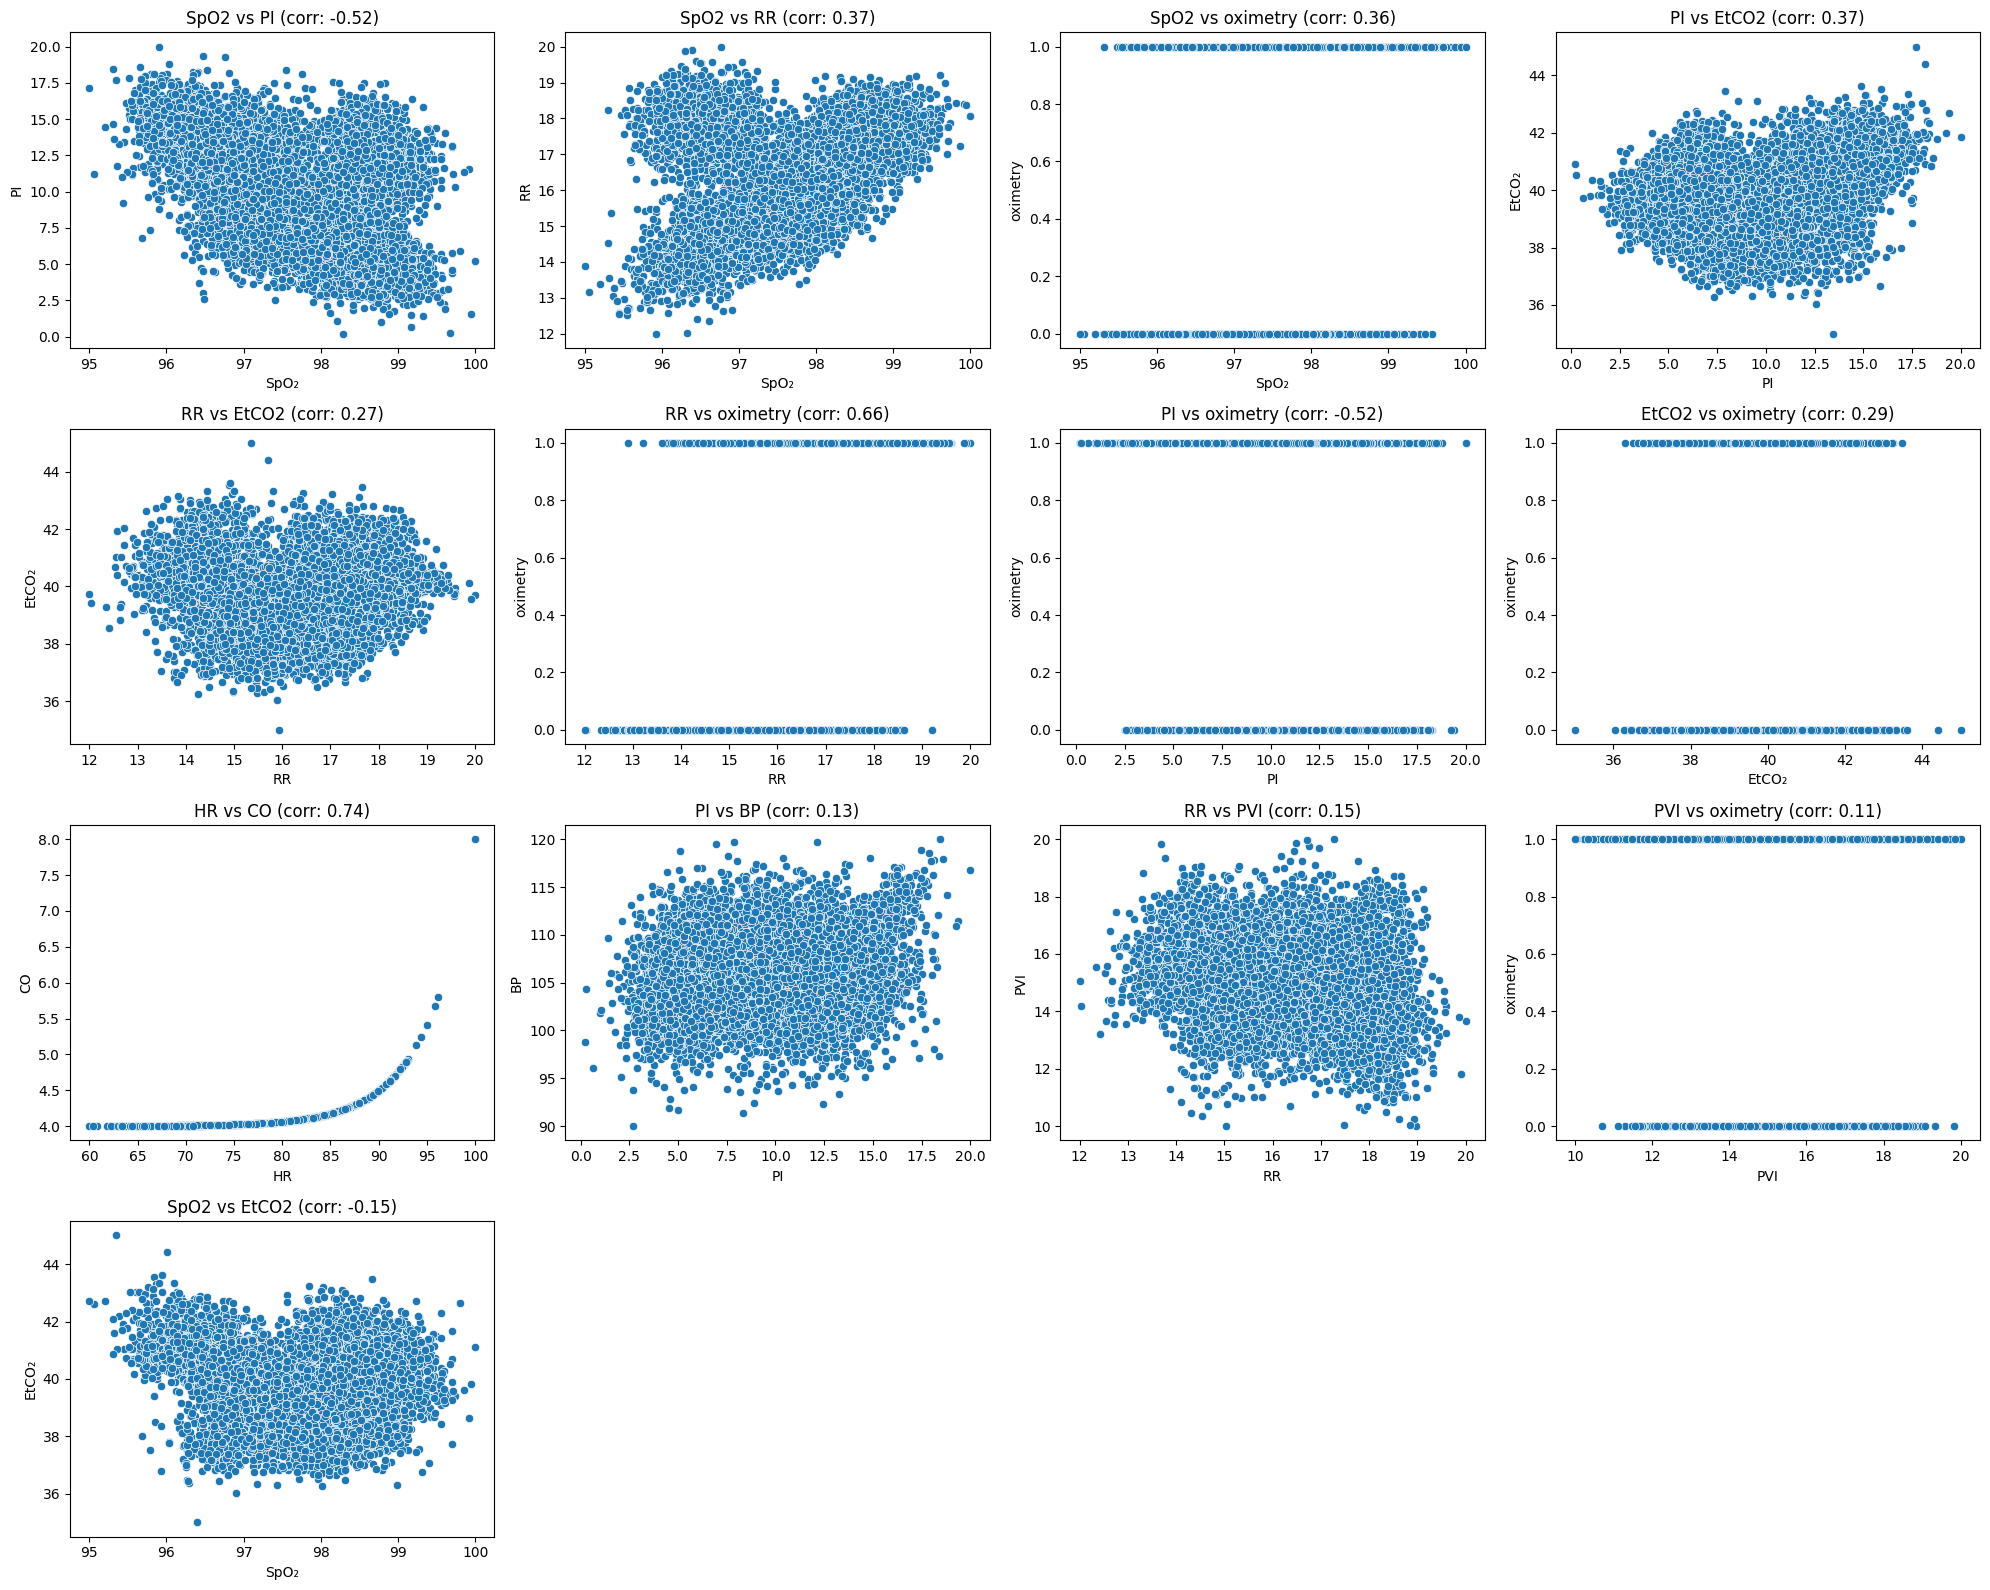

In [16]:
# Create 4x4 grid for 13 plots (we'll have 3 empty spots)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))

# All pairs with |correlation| >= 0.10:

# 1. SpO2 vs PI: -0.52
sns.scatterplot(x='SpO₂', y='PI', data=observation, ax=axes[0,0])
axes[0,0].set_title('SpO2 vs PI (corr: -0.52)')

# 2. SpO2 vs RR: 0.37
sns.scatterplot(x='SpO₂', y='RR', data=observation, ax=axes[0,1])
axes[0,1].set_title('SpO2 vs RR (corr: 0.37)')

# 3. SpO2 vs oximetry: 0.36
sns.scatterplot(x='SpO₂', y='oximetry', data=observation, ax=axes[0,2])
axes[0,2].set_title('SpO2 vs oximetry (corr: 0.36)')

# 4. PI vs EtCO2: 0.37
sns.scatterplot(x='PI', y='EtCO₂', data=observation, ax=axes[0,3])
axes[0,3].set_title('PI vs EtCO2 (corr: 0.37)')

# 5. RR vs EtCO2: 0.27
sns.scatterplot(x='RR', y='EtCO₂', data=observation, ax=axes[1,0])
axes[1,0].set_title('RR vs EtCO2 (corr: 0.27)')

# 6. RR vs oximetry: 0.66
sns.scatterplot(x='RR', y='oximetry', data=observation, ax=axes[1,1])
axes[1,1].set_title('RR vs oximetry (corr: 0.66)')

# 7. PI vs oximetry: -0.52
sns.scatterplot(x='PI', y='oximetry', data=observation, ax=axes[1,2])
axes[1,2].set_title('PI vs oximetry (corr: -0.52)')

# 8. EtCO2 vs oximetry: 0.29
sns.scatterplot(x='EtCO₂', y='oximetry', data=observation, ax=axes[1,3])
axes[1,3].set_title('EtCO2 vs oximetry (corr: 0.29)')

# 9. HR vs CO: 0.74
sns.scatterplot(x='HR', y='CO', data=observation, ax=axes[2,0])
axes[2,0].set_title('HR vs CO (corr: 0.74)')

# 10. PI vs BP: 0.13
sns.scatterplot(x='PI', y='BP', data=observation, ax=axes[2,1])
axes[2,1].set_title('PI vs BP (corr: 0.13)')

# 11. RR vs PVI: 0.15
sns.scatterplot(x='RR', y='PVI', data=observation, ax=axes[2,2])
axes[2,2].set_title('RR vs PVI (corr: 0.15)')

# 12. PVI vs oximetry: 0.11
sns.scatterplot(x='PVI', y='oximetry', data=observation, ax=axes[2,3])
axes[2,3].set_title('PVI vs oximetry (corr: 0.11)')

# 13. SpO2 vs EtCO2: -0.15
sns.scatterplot(x='SpO₂', y='EtCO₂', data=observation, ax=axes[3,0])
axes[3,0].set_title('SpO2 vs EtCO2 (corr: -0.15)')

# Hide the 3 empty subplots
axes[3,1].set_visible(False)
axes[3,2].set_visible(False)
axes[3,3].set_visible(False)

plt.tight_layout()
plt.show()

The resulting visualization makes it easy to see which variables are most strongly related:

The strongest positive correlation is between HR (heart rate) and CO (cardiac output, r = 0.74).

RR (respiratory rate) and oximetry also show a notable positive correlation (r = 0.66).

Negative correlations are observed between PI (perfusion index) and both SpO₂ (r = –0.52) and oximetry (r = –0.52).

Thanks to the plots, we can visually confirm and support the correlation results. The results are showing are both the strength and pattern of dependencies between key physiological parameters and the predicted variable -> oximetry.
<br><br>

#### Patient

In [17]:
patient.head()

,residence,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID
0,NaN,"(Decimal('-39.6140315'), Decimal('22.351713'))",A+,NaN,schachtkaren@web.de,1135,1923-01-03,Ruppert Stey GbR,Raymund Benthin,hornigdan,226-93-4078,2021-04-21,729
1,NaN,"(Decimal('69.634637'), Decimal('66.117558'))",AB-,NaN,plopes@gmail.com,773,1918-05-23,Gonçalves e Filhos,Leonardo Mendonça,diasana-clara,35096471810,"12/16/2019, 00:00:00",668
2,NaN,"(Decimal('19.563271'), Decimal('-41.108627'))",AB-,NaN,tanakayoko@hotmail.com,1532,2001-01-04,中村食品有限会社,吉田 陽子,sayuri90,066-73-4209,2023/01/30,482
3,NaN,"(Decimal('34.010482'), Decimal('129.946434'))",O-,NaN,brandoncruz@yahoo.com,2025,NaN,Silva-Gardner,Scott Thomas,rossjoy,368-27-2375,09 Feb 2024,284
4,NaN,"(Decimal('61.148803'), Decimal('115.371931'))",O+,NaN,serragliogiorgio@tiscali.it,638,1997-05-14,Ortese-Agnesi s.r.l.,Dott. Maurilio Zanazzo,orlandogilardoni,SNSGNT39E71B896C,2022-03-09,572


We can see that current_location contains latitude and longitude, therefore we have decided to split them into 2 columns. Also there are different date formats which we need to make into same format.

In [18]:
coords = patient['current_location'].str.extract(
    r"Decimal\('([-0-9.]+)'\).*Decimal\('([-0-9.]+)'\)"
)

patient['latitude'] = pd.to_numeric(coords[0], errors='coerce')
patient['longitude'] = pd.to_numeric(coords[1], errors='coerce')

patient.describe()

,residence,user_id,station_ID,latitude,longitude
count,0.0,2128.000000,2128.000000,2022.000000,2022.000000
mean,NaN,1074.037594,390.836936,0.449233,3.536263
std,NaN,611.516264,224.274660,52.214570,102.595709
min,NaN,0.000000,0.000000,-89.974802,-179.928645
25%,NaN,554.000000,193.000000,-45.312505,-85.899696
50%,NaN,1074.500000,394.000000,0.405269,8.928997
75%,NaN,1607.250000,587.250000,46.580815,92.708868
max,NaN,2127.000000,770.000000,89.835507,179.913557


Here we have split the attribute "current_location" which before contained both latitude and longtitude to the seperate attributes. With this we hope that we will be able to connect several tables.

In [19]:
station.head()

,location,code,revision,station,latitude,longitude
0,Europe/Madrid,ES,"12/22/2016, 00:00:00",San Juan de Aznalfarache,37.35813,-6.03731
1,America/Bogota,CO,22 Jul 2023,Villa del Rosario,7.83389,-72.47417
2,Asia/Kolkata,IN,2022/09/04,Rangia,26.44931,91.61356
3,America/Chicago,US,2021/03/29,Rolla,37.95143,-91.77127
4,Europe/Berlin,DE,2023/09/12,Albstadt,48.21644,9.02596


In [20]:
station.describe()

,latitude,longitude
count,772.000000,772.000000
mean,28.652487,9.132671
std,23.967608,73.458813
min,-54.800000,-156.474320
25%,14.443685,-67.331220
50%,36.230840,8.874040
75%,46.372028,69.920535
max,65.933810,168.313660


In [21]:
observation.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,...,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000,12107.000000
mean,97.720877,78.139220,9.280387,16.420159,39.761272,61.836198,106.629738,106.142109,35.712456,10.013732,...,4.068934,51.897652,51.293918,50.545308,55.540997,0.249564,29.975732,0.596845,28.671404,9.237063
std,0.849157,4.782149,3.432338,1.287131,1.220140,10.182272,24.520873,3.676340,0.606630,1.009803,...,0.094006,12.439194,11.859092,12.741621,11.301895,0.028901,5.765204,0.490552,23.945771,73.361001
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,6.063736,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-156.474320
25%,97.073862,74.938806,6.543803,15.418921,38.840854,55.076625,90.088136,103.704873,35.307574,9.331576,...,4.021535,43.468302,43.298068,42.100520,47.965348,0.224556,24.960719,0.000000,14.420440,-67.331220
50%,97.850262,78.124134,8.703433,16.493047,39.782823,61.853122,106.339196,106.122106,35.711898,10.012485,...,4.041752,51.983722,51.298702,50.436869,55.588062,0.249187,30.054808,1.000000,36.246240,8.881040
75%,98.359154,81.345487,12.159623,17.466124,40.708415,68.679155,123.256573,108.536922,36.114306,10.698413,...,4.081694,60.322630,59.309318,59.247765,63.116464,0.274669,34.948440,1.000000,46.518720,71.211690
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,14.205771,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,65.933810,168.313660


We have noticed, that there are different date formats which we will need to make into same format. Furthermore we have noticed that sation.latitude and station.longitude have same distributions, std and mean as observation.latitude and observation.longitude, we can expect that these connect the two datasets.

In [22]:
station_coords = set(zip(station['latitude'], station['longitude']))

observation['matches_station'] = observation.apply(
    lambda row: (row['latitude'], row['longitude']) in station_coords, axis=1
)

num_matches = observation['matches_station'].sum()
total_obs = len(observation)

print(f"{num_matches} out of {total_obs} observations match station coordinates.")
observation.drop(columns=['matches_station'], inplace=True)

12107 out of 12107 observations match station coordinates.


In [23]:
observation_coords = set(zip(observation['latitude'], observation['longitude']))

station['has_observation'] = station.apply(
    lambda row: (row['latitude'], row['longitude']) in observation_coords, axis=1
)

num_matches = station['has_observation'].sum()
total_stations = len(station)

print(f"{num_matches} out of {total_stations} stations have matching observation coordinates.")
station.drop(columns=['has_observation'], inplace=True)

772 out of 772 stations have matching observation coordinates.


It was confirmed that station cordinates match with observation cordinates and vice versa.

With this information we can safely merge them (e.g., by latitude and longitude or station ID) without worrying about mismatched entries.

It also indicates data quality is high — no missing or corrupted coordinate pairs (logtitutde and latitude).

Every observation can be reliably linked to a station-level context (e.g., device location, altitude, or environmental conditions).

Result: Datasets are alligned - every observation belongs to a known station, and every station has at least one observation.

---

<br><br><br>

### D - Potential predictors

Identify dependencies between the predicted variable and other variables (potential predictors).

In [24]:
numeric_cols = observation.select_dtypes(include=np.number).columns

corr_spearman = observation[numeric_cols].corr(method='spearman')['oximetry'].sort_values(ascending=False)

print(corr_spearman)

oximetry                 1.000000
RR                       0.669143
SpO₂                     0.400411
EtCO₂                    0.307589
BP                       0.018955
Blood Flow Index         0.011153
HR                       0.010209
CO                       0.010190
Respiratory effort       0.006981
Signal Quality Index     0.006935
longitude                0.006118
Motion/Activity index    0.006110
Hb level                -0.001174
SNR                     -0.003230
PRV                     -0.003779
PPG waveform features   -0.004232
FiO₂                    -0.004978
Skin Temperature        -0.006122
latitude                -0.007828
O₂ extraction ratio     -0.010159
SV                      -0.019628
PVI                     -0.105327
PI                      -0.119275
Name: oximetry, dtype: float64


Based on Spearman’s correlation, the attributes with the strongest relationship to the target variable oximetry were identified.
The variable “RR” (respiratory rate) shows the highest positive correlation, followed by “SpO₂” and “EtCO₂”, suggesting that higher values of these variables tend to be associated with higher oximetry readings.
Most other variables show very weak or negligible correlations, indicating limited influence on oximetry.
A few attributes, such as “PVI” and “PI”, exhibit negative correlations, meaning that as these values increase, oximetry tends to decrease slightly.
The correlations were visualized in the graph below, which illustrates the relative strength and direction of each attribute’s relationship with oximetry.

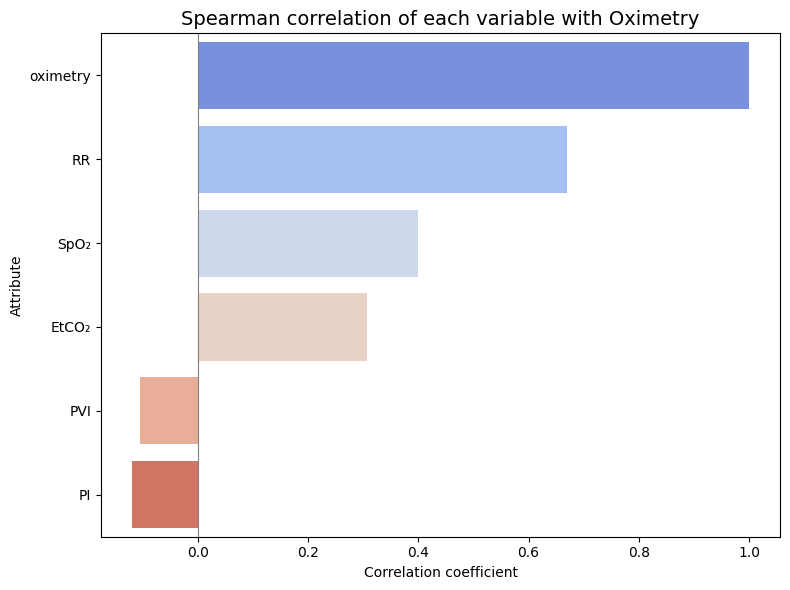

In [25]:
corr_filtered = corr_spearman[abs(corr_spearman) > 0.1]
plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_filtered.values,
    y=corr_filtered.index,
    hue=corr_filtered.index,
    palette='coolwarm',
    orient='h',
    legend=False
)
plt.title('Spearman correlation of each variable with Oximetry', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.ylabel('Attribute')
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

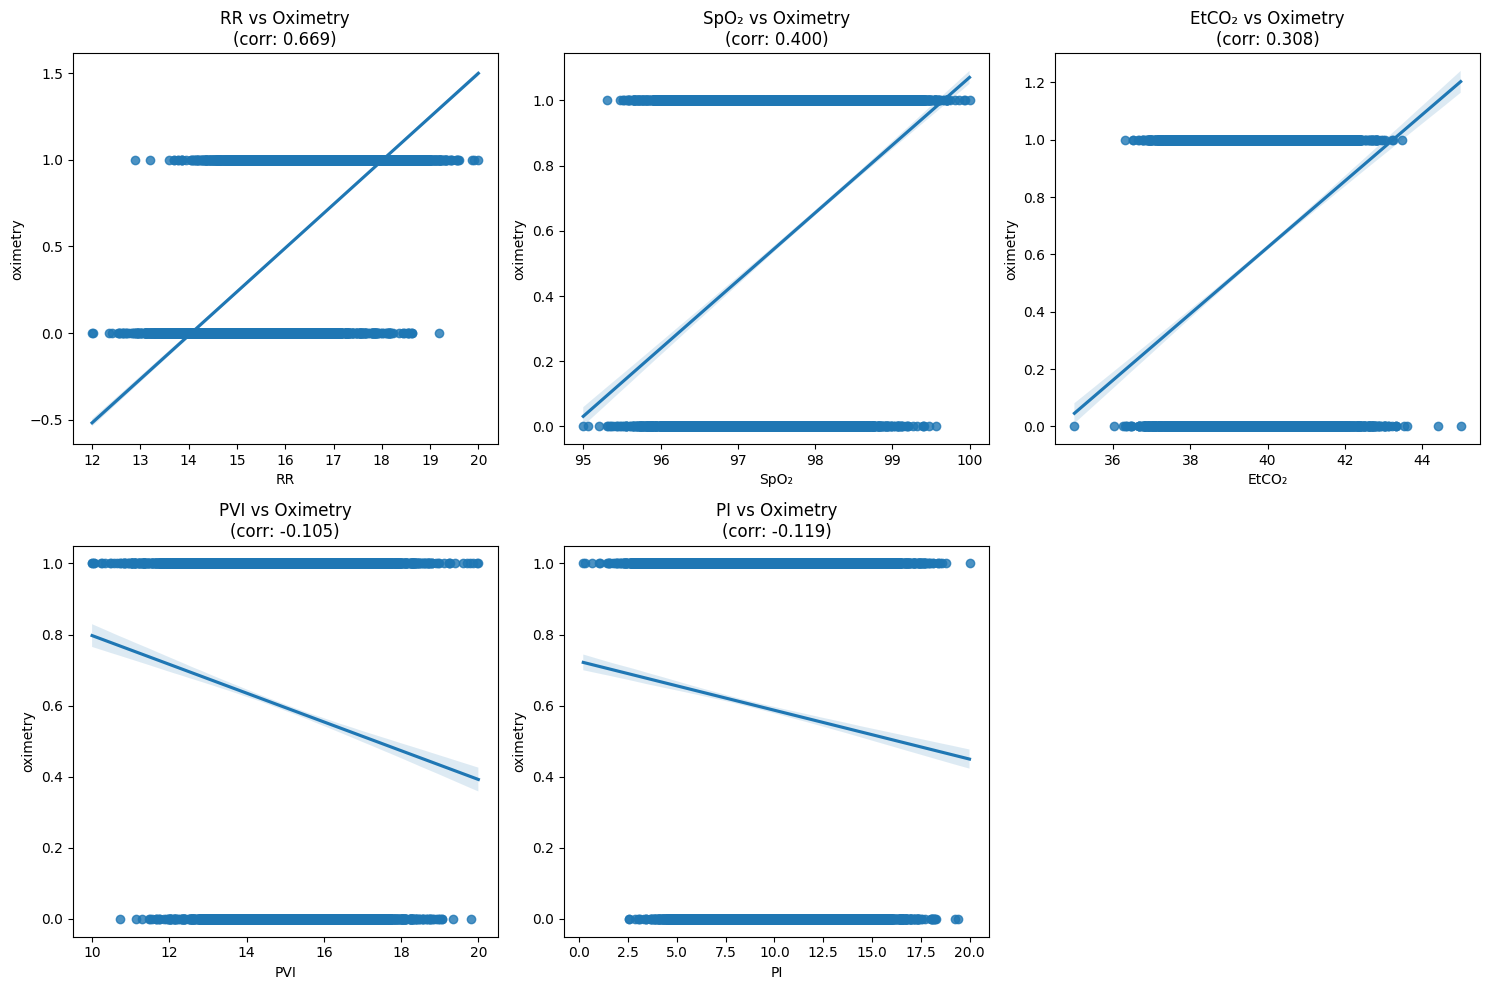

In [26]:
#create grid dimensions
n_plots = len(corr_filtered) - 1 #(-1 bcs we do not need the first attribute)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

#here we create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

#we neeed to faltten the axis
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if n_cols == 1 else axes

# Create regplot for each attribute in corr_filtered (we skip the first bcs oximentry vs oximetry is useless)
for i, attribute in enumerate(corr_filtered.index[1:], 0):  # Start from index 1, enumerate from 0
    sns.regplot(x=attribute, y='oximetry', data=observation, ax=axes[i])
    axes[i].set_title(f'{attribute} vs Oximetry\n(corr: {corr_filtered[attribute]:.3f})')

#remove last empty plot
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Each subplot displays a scatter plot with a fitted regression line, allowing visual inspection of the direction (we can see both, positive or negative) and strength of the relationships.
Overall, this visualization helps confirm the correlations numerically identified earlier and provides insight into whether the relationships appear linear or more complex.

---

<br><br><br>

### E - Observations)

Observations made by us, which we determined based on us studying this topic nad datasets

In the following section, we explored the contents of the datasets provided for this project (station, patient, and observation). We examined their structure, data types, and the presence of missing values, as well as the overall correlations and relationships both between the tables and within their individual attributes.
Our main objective was to focus on the oximetry parameter and to analyze how other attributes correlate with it — whether positively, negatively, or neutrally. The results were visualized using various graphs and plots, each accompanied by a brief interpretation.
All important observations, findings, and interpretations have been documented directly under the corresponding diagrams and code sections throughout the report.

## 1.2 - Identification of problems, data integration, and cleaning

## A - Data problems

Identify and initially address data problems such as: unsuitable data structure, duplicate records that may arise after certain transformations, inconsistent formats, missing values, and outliers. Other (not listed) problems may also occur, or fewer problems than those mentioned.

### Observation

First we will look if there are any duplicate records.

In [27]:
observation[observation.duplicated(keep=False)]

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
2045,97.959363,72.504624,5.982921,17.487597,37.843251,55.169099,145.133297,104.643107,36.55279,10.057312,...,4.012683,53.145045,62.450684,43.958664,46.461306,0.277102,34.929818,1.0,22.19303,88.18466
5160,97.959363,72.504624,5.982921,17.487597,37.843251,55.169099,145.133297,104.643107,36.55279,10.057312,...,4.012683,53.145045,62.450684,43.958664,46.461306,0.277102,34.929818,1.0,22.19303,88.18466


For observation table there are these problems with data we have noticed:
- oximetry has more suitable data structure, we will change it from float to boolean
- we have one duplicate record which we will remove

In observation table there are no null-value records (found in 1.1.A.Observation), that we would have to take care of. All the other attributes are in their valid range (Found in 1.1.B.Observation).

In [28]:
observation['oximetry'] = observation['oximetry'].astype(bool)
observation.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,96.511604,67.597663,14.451123,17.461063,41.262037,87.821291,126.965235,109.471152,35.650826,11.429092,...,4.004591,44.065731,36.604550,69.140438,57.097309,0.210117,33.584512,True,19.64745,-102.04897
1,98.113516,72.872900,4.699563,17.231104,40.220086,64.283914,139.509502,100.943658,35.313317,11.188645,...,4.014983,36.498878,61.305805,50.733704,61.220158,0.293664,30.528645,True,28.15112,-82.46148
2,98.623248,81.418306,12.056504,16.832868,39.953184,77.164206,104.396821,107.401302,36.017931,8.980842,...,4.083922,52.803185,49.432273,41.841466,57.554854,0.232518,22.357337,True,-38.16604,145.13643
3,96.821905,69.356881,11.044410,14.876013,38.765113,59.296747,180.845101,106.786082,35.433515,9.952747,...,4.006763,52.800923,68.710875,47.524447,48.971775,0.288125,25.886190,False,40.63316,-74.13653
4,98.523262,70.686313,5.963887,16.933547,41.470854,66.145767,111.525074,108.354216,35.258355,10.619401,...,4.008813,25.406073,33.993656,60.323832,54.807359,0.295855,20.836752,True,4.88441,101.96857


After the changes to the data we can see now in oximetry table True/false.

In [29]:
observation = observation.drop_duplicates()
observation[observation.duplicated(keep=False)]

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude


We have removed the duplicate, when we run the command for searching duplicates we can see that there are none.

### Patient

In [30]:
patient = patient.drop_duplicates()
patient[patient.duplicated(keep=False)]

,residence,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID,latitude,longitude


For patient table we have these problems:
- residence table has no non-null values - it should be removed (found in 1.1.A.Patient)
- current_location, job and birthdate have missing values (found in 1.1.A.Patient) - we wont fix this because this we can declare as optional information for patients
- birthdate and registration have different date types (found in 1.1.A.Patient) - it should be standarized
-  there are duplicate mails and usernames (found in 1.1.A.Patient) which should be unique but this can be result of sourcing from different sources - we wont fix this
-  there are duplicate user_ids (found in 1.1.A.Patient) which should be unique, we have 2 options: make new ids or we can use ssn as unique identifier since these dont have duplicates
-  current_location should be partitioned into latitude and longitude ( already done in 1.1.C.Patient) we will also remove the original column

We can see that there are no duplicates.

In [31]:
patient = patient.drop(columns=['residence'])
patient.head()

,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID,latitude,longitude
0,"(Decimal('-39.6140315'), Decimal('22.351713'))",A+,NaN,schachtkaren@web.de,1135,1923-01-03,Ruppert Stey GbR,Raymund Benthin,hornigdan,226-93-4078,2021-04-21,729,-39.614032,22.351713
1,"(Decimal('69.634637'), Decimal('66.117558'))",AB-,NaN,plopes@gmail.com,773,1918-05-23,Gonçalves e Filhos,Leonardo Mendonça,diasana-clara,35096471810,"12/16/2019, 00:00:00",668,69.634637,66.117558
2,"(Decimal('19.563271'), Decimal('-41.108627'))",AB-,NaN,tanakayoko@hotmail.com,1532,2001-01-04,中村食品有限会社,吉田 陽子,sayuri90,066-73-4209,2023/01/30,482,19.563271,-41.108627
3,"(Decimal('34.010482'), Decimal('129.946434'))",O-,NaN,brandoncruz@yahoo.com,2025,NaN,Silva-Gardner,Scott Thomas,rossjoy,368-27-2375,09 Feb 2024,284,34.010482,129.946434
4,"(Decimal('61.148803'), Decimal('115.371931'))",O+,NaN,serragliogiorgio@tiscali.it,638,1997-05-14,Ortese-Agnesi s.r.l.,Dott. Maurilio Zanazzo,orlandogilardoni,SNSGNT39E71B896C,2022-03-09,572,61.148803,115.371931


In [32]:
patient['birthdate'] = patient['birthdate'].apply(lambda x: dateparser.parse(str(x)) if pd.notnull(x) else np.nan)
patient['registration'] = patient['registration'].apply(lambda x: dateparser.parse(str(x)) if pd.notnull(x) else np.nan)
patient.head()

C:\Users\mbebe\AppData\Local\Temp\ipykernel_16672\1452451932.py:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  patient['birthdate'] = patient['birthdate'].apply(lambda x: dateparser.parse(str(x)) if pd.notnull(x) else np.nan)
C:\Users\mbebe\AppData\Local\Temp\ipykernel_16672\1452451932.py:2: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  patient['regist

,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID,latitude,longitude
0,"(Decimal('-39.6140315'), Decimal('22.351713'))",A+,NaN,schachtkaren@web.de,1135,1923-01-03,Ruppert Stey GbR,Raymund Benthin,hornigdan,226-93-4078,2021-04-21,729,-39.614032,22.351713
1,"(Decimal('69.634637'), Decimal('66.117558'))",AB-,NaN,plopes@gmail.com,773,1918-05-23,Gonçalves e Filhos,Leonardo Mendonça,diasana-clara,35096471810,2019-12-16,668,69.634637,66.117558
2,"(Decimal('19.563271'), Decimal('-41.108627'))",AB-,NaN,tanakayoko@hotmail.com,1532,2001-01-04,中村食品有限会社,吉田 陽子,sayuri90,066-73-4209,2023-01-30,482,19.563271,-41.108627
3,"(Decimal('34.010482'), Decimal('129.946434'))",O-,NaN,brandoncruz@yahoo.com,2025,NaT,Silva-Gardner,Scott Thomas,rossjoy,368-27-2375,2024-02-09,284,34.010482,129.946434
4,"(Decimal('61.148803'), Decimal('115.371931'))",O+,NaN,serragliogiorgio@tiscali.it,638,1997-05-14,Ortese-Agnesi s.r.l.,Dott. Maurilio Zanazzo,orlandogilardoni,SNSGNT39E71B896C,2022-03-09,572,61.148803,115.371931


We need to verify that no dates were lost in the standarization, at the beginning we had 1170 non-null birthdates and 2128 non-registration and now we have the same number so we didnt lose any information.

In [33]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   current_location  2022 non-null   object        
 1   blood_group       2128 non-null   object        
 2   job               638 non-null    object        
 3   mail              2128 non-null   object        
 4   user_id           2128 non-null   int64         
 5   birthdate         1170 non-null   datetime64[ns]
 6   company           2128 non-null   object        
 7   name              2128 non-null   object        
 8   username          2128 non-null   object        
 9   ssn               2128 non-null   object        
 10  registration      2128 non-null   datetime64[ns]
 11  station_ID        2128 non-null   int64         
 12  latitude          2022 non-null   float64       
 13  longitude         2022 non-null   float64       
dtypes: datetime64[ns](2), fl

We have decided that the unique identifier of person will be snn, therefore we will not make new ids.

### Station

In [34]:
station = station.drop_duplicates()
station[station.duplicated(keep=False)]

,location,code,revision,station,latitude,longitude


We can see there are no duplicate records, but we can also see that there are records that differ by revision only.

In [35]:
station[station.duplicated(subset=['station', 'latitude', 'longitude'], keep=False)].sort_values(by='station')

,location,code,revision,station,latitude,longitude
245,America/Mazatlan,MX,2019-04-05,Acaponeta,22.49396,-105.36369
750,America/Mazatlan,MX,31 Mar 2018,Acaponeta,22.49396,-105.36369
691,Europe/Zurich,CH,"07/22/2024, 00:00:00",Adliswil,47.30997,8.52462
137,Europe/Zurich,CH,2025-06-25,Adliswil,47.30997,8.52462
159,America/Puerto_Rico,PR,2016/09/10,Aguadilla,18.42745,-67.15407
...,...,...,...,...,...,...
574,Europe/Moscow,RU,"03/05/2022, 00:00:00",Zhukovka,53.53395,33.72798
111,Europe/Moscow,RU,26 Jun 2019,Zhukovka,53.53395,33.72798
405,Europe/Moscow,RU,2017/01/14,Zhukovka,53.53395,33.72798
142,Europe/Moscow,RU,2021/06/24,Zhukovka,53.53395,33.72798


We have found out before that observation table is linked to station table by latitude and longtitude. We also seen that there are coordinates in patient table, so we decided to check if they also link the datasets together.

In [36]:
station_coords = set(zip(station['latitude'], station['longitude']))

patient['matches_station'] = patient.apply(
    lambda row: (row['latitude'], row['longitude']) in station_coords, axis=1
)

num_matches = patient['matches_station'].sum()
total_obs = len(patient)

print(f"{num_matches} out of {total_obs} patient match station coordinates.")
patient.drop(columns=['matches_station'], inplace=True)

0 out of 2128 patient match station coordinates.


In [37]:
patient_coords = set(zip(patient['latitude'], patient['longitude']))

station['matches_station'] = station.apply(
    lambda row: (row['latitude'], row['longitude']) in patient_coords, axis=1
)

num_matches = station['matches_station'].sum()
total_obs = len(station)

print(f"{num_matches} out of {total_obs} station match patient coordinates.")
station.drop(columns=['matches_station'], inplace=True)

0 out of 772 station match patient coordinates.


We can see that coordinates between patient and station dont match. But we thought that coordinates in patient dataset represent location of homes, which would explain why the coordinates dont match. If this would be true maybe the tables are linked by coordinates in patient table being closest to the coordinates in station table - we can think of this as districts, patient goes to the closest station.
We have decided to check this by finding each pacients closest station and determining if all patients with this station have same station_ID. 

In [38]:
patient['closest_station_row'] = None

for i, p in patient.iterrows():
    diffs = np.sqrt(
        (station['latitude'] - p['latitude'])**2 +
        (station['longitude'] - p['longitude'])**2
    )
    
    if diffs.notna().any():
        closest_idx = diffs.idxmin()
        patient.at[i, 'closest_station_row'] = closest_idx
    else:
        patient.at[i, 'closest_station_row'] = None

patient.head()

,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID,latitude,longitude,closest_station_row
0,"(Decimal('-39.6140315'), Decimal('22.351713'))",A+,NaN,schachtkaren@web.de,1135,1923-01-03,Ruppert Stey GbR,Raymund Benthin,hornigdan,226-93-4078,2021-04-21,729,-39.614032,22.351713,748
1,"(Decimal('69.634637'), Decimal('66.117558'))",AB-,NaN,plopes@gmail.com,773,1918-05-23,Gonçalves e Filhos,Leonardo Mendonça,diasana-clara,35096471810,2019-12-16,668,69.634637,66.117558,630
2,"(Decimal('19.563271'), Decimal('-41.108627'))",AB-,NaN,tanakayoko@hotmail.com,1532,2001-01-04,中村食品有限会社,吉田 陽子,sayuri90,066-73-4209,2023-01-30,482,19.563271,-41.108627,102
3,"(Decimal('34.010482'), Decimal('129.946434'))",O-,NaN,brandoncruz@yahoo.com,2025,NaT,Silva-Gardner,Scott Thomas,rossjoy,368-27-2375,2024-02-09,284,34.010482,129.946434,413
4,"(Decimal('61.148803'), Decimal('115.371931'))",O+,NaN,serragliogiorgio@tiscali.it,638,1997-05-14,Ortese-Agnesi s.r.l.,Dott. Maurilio Zanazzo,orlandogilardoni,SNSGNT39E71B896C,2022-03-09,572,61.148803,115.371931,470


In [39]:
patient.sort_values(by='station_ID').head(10)

,current_location,blood_group,job,mail,user_id,birthdate,company,name,username,ssn,registration,station_ID,latitude,longitude,closest_station_row
496,NaN,AB-,NaN,amoreira@gmail.com,461,NaT,Pires,Nathan Rodrigues,almeidaluna,97251083450,2023-11-05,0,NaN,NaN,None
1694,"(Decimal('-62.0694705'), Decimal('72.524452'))",B+,NaN,pergandeekkehard@aol.de,838,1914-03-28,Freudenberger,Ing. Sigurd Hecker B.Eng.,baererkatrin,104-11-9657,2022-03-21,1,-62.069471,72.524452,527
1912,"(Decimal('74.3023135'), Decimal('-133.596072'))",AB-,NaN,ricolfimelissa@hotmail.com,1034,1919-04-05,"Ajello, Endrizzi e Mercantini SPA",Olga Silvestri,blucchesi,MSTLVR21C10I442X,2019-07-19,3,74.302313,-133.596072,251
525,"(Decimal('38.7245715'), Decimal('-20.625429'))",B-,NaN,satotaichi@gmail.com,708,1914-02-02,斉藤電気株式会社,加藤 知実,yuisato,682-99-3294,2022-11-05,3,38.724572,-20.625429,540
1088,"(Decimal('-50.1687315'), Decimal('93.008096'))",AB+,経営者,yuta59@yahoo.com,1057,NaT,池田建設合同会社,中村 桃子,takahashisatomi,740-06-7328,2023-10-19,3,-50.168731,93.008096,48
383,"(Decimal('-19.979110'), Decimal('89.268111'))",B-,NaN,nergerali@hotmail.de,821,1969-05-24,Hermann GmbH,Frau Annelene Scheibe B.Sc.,djacobi-jaeckel,099-77-3510,2019-06-01,3,-19.979110,89.268111,301
1718,"(Decimal('1.710673'), Decimal('21.537162'))",A+,NaN,mshimizu@hotmail.com,137,NaT,株式会社森印刷,鈴木 充,kaori56,720-02-5749,2024-07-30,4,1.710673,21.537162,457
1537,"(Decimal('-48.163785'), Decimal('86.526820'))",AB+,NaN,brunhildejessel@web.de,1351,1970-07-11,Klapp GmbH,Kunigunda Hering-Bruder,zenon15,543-10-6498,2024-06-15,4,-48.163785,86.526820,48
1121,"(Decimal('-59.065996'), Decimal('120.290969'))",B+,Child psychotherapist,maria36@hotmail.com,1004,NaT,"Tran, Guerra and Edwards",Daniel Meyer,brian78,372-70-4643,2020-05-12,5,-59.065996,120.290969,48
1332,"(Decimal('-12.915945'), Decimal('-13.119619'))",A-,Programmierer,tackermann@gmail.com,1323,1910-12-07,Wagenknecht,Univ.Prof. Valentine Oestrovsky,sstaude,519-68-9808,2020-03-21,5,-12.915945,-13.119619,180


We can see that patients with same closest station have different station_ID stated. 
This could have been caused by stations being in different countries or despite being closest not being fastest to get to, therefore we decided to visualize all patients stations with x and y being coordinates and their colour being the same for same IDs. 

In [40]:
from ipywidgets import interact


unique_stations = patient['station_ID'].unique()
colors = np.random.rand(len(unique_stations), 3)
color_map = {station: color for station, color in zip(unique_stations, colors)}


@interact(station=sorted(unique_stations))
def plot_station(station=3):
    plt.figure(figsize=(10, 8))
    subset = patient[patient['station_ID'] == station]

    plt.scatter(subset['longitude'], subset['latitude'], 
                color=color_map[station], s=50, alpha=0.8)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Patients for Station: {station}')
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='station', index=2, options=(np.int64(0), np.int64(1), np.int64(3),…

We can chose specific station_ID and watch that the patients with the same station_ID are really far away from each other. Therefore we concluded that we cannot link the two datasets together. 

For station table we have these problems:
- revision date doesnt have standarized date type
- there are duplicites that have everything same but revision date, we have decided to parse this into two tables station and revisions: station table will contain information about stations and revision table will contain information about revisions of the stations, these two tables will be linked by station_identifier, which will be integer specific for each station (this number is different than patient.station_ID), we will also link the station table to observation table with this station_identifier instead of using full set of coordinates.
- location having continent name and city name, we have decided to parse this into 2 columns: continent and city
- code has two null values, we will try to fill them in


In [41]:
station[station['code'].isnull()]

,location,code,revision,station,latitude,longitude
163,Africa/Windhoek,NaN,2025/07/30,Okahandja,-21.98333,16.91667
456,Africa/Windhoek,NaN,2022-03-06,Okahandja,-21.98333,16.91667


We can add code to this station, Windhoek is in Namibia which has two letter country code NA. 

In [42]:
station['code'] = station['code'].fillna('NA')
station[station['code'].isnull()]

,location,code,revision,station,latitude,longitude


In [43]:
station['revision'] = station['revision'].apply(lambda x: dateparser.parse(str(x)) if pd.notnull(x) else np.nan)
station.head()

C:\Users\mbebe\AppData\Local\Temp\ipykernel_16672\3436255752.py:1: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  station['revision'] = station['revision'].apply(lambda x: dateparser.parse(str(x)) if pd.notnull(x) else np.nan)


,location,code,revision,station,latitude,longitude
0,Europe/Madrid,ES,2016-12-22,San Juan de Aznalfarache,37.35813,-6.03731
1,America/Bogota,CO,2023-07-22,Villa del Rosario,7.83389,-72.47417
2,Asia/Kolkata,IN,2022-09-04,Rangia,26.44931,91.61356
3,America/Chicago,US,2021-03-29,Rolla,37.95143,-91.77127
4,Europe/Berlin,DE,2023-09-12,Albstadt,48.21644,9.02596


In [44]:
station_unique = station[['location', 'code', 'station','latitude','longitude']].drop_duplicates().reset_index(drop=True)
station_unique['station_identifier'] = range(0, len(station_unique))
revision = station.merge(station_unique,on=['location', 'code', 'station','latitude','longitude'],how='right') 
revision.drop(columns=['location', 'code', 'station','latitude','longitude'], inplace=True)
revision = revision[['station_identifier','revision']]
station = station_unique[['station_identifier', 'location', 'code', 'station','latitude','longitude']]

In [45]:
station.head()

,station_identifier,location,code,station,latitude,longitude
0,0,Europe/Madrid,ES,San Juan de Aznalfarache,37.35813,-6.03731
1,1,America/Bogota,CO,Villa del Rosario,7.83389,-72.47417
2,2,Asia/Kolkata,IN,Rangia,26.44931,91.61356
3,3,America/Chicago,US,Rolla,37.95143,-91.77127
4,4,Europe/Berlin,DE,Albstadt,48.21644,9.02596


In [46]:
revision.head().sort_values(by='station_identifier')
revision['station_identifier'] = revision['station_identifier'].astype(int)

In [47]:
temp = revision.merge(station,on=['station_identifier'],how='left')
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   station_identifier  772 non-null    int64         
 1   revision            772 non-null    datetime64[ns]
 2   location            772 non-null    object        
 3   code                772 non-null    object        
 4   station             772 non-null    object        
 5   latitude            772 non-null    float64       
 6   longitude           772 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 42.3+ KB


We can see that after the parsing of tables and then merging them back together we still have 772 records with 2 codes being null.

In [48]:
observation = observation.merge(station, on=['latitude','longitude'],how='left')
observation.drop(columns=['location', 'code', 'station','latitude','longitude'], inplace=True)
observation['station_identifier'] = observation['station_identifier'].astype(int)
observation.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,station_identifier
0,96.511604,67.597663,14.451123,17.461063,41.262037,87.821291,126.965235,109.471152,35.650826,11.429092,...,83.801243,4.004591,44.065731,36.604550,69.140438,57.097309,0.210117,33.584512,True,461
1,98.113516,72.872900,4.699563,17.231104,40.220086,64.283914,139.509502,100.943658,35.313317,11.188645,...,78.047479,4.014983,36.498878,61.305805,50.733704,61.220158,0.293664,30.528645,True,166
2,98.623248,81.418306,12.056504,16.832868,39.953184,77.164206,104.396821,107.401302,36.017931,8.980842,...,86.640923,4.083922,52.803185,49.432273,41.841466,57.554854,0.232518,22.357337,True,34
3,96.821905,69.356881,11.044410,14.876013,38.765113,59.296747,180.845101,106.786082,35.433515,9.952747,...,87.187544,4.006763,52.800923,68.710875,47.524447,48.971775,0.288125,25.886190,False,66
4,98.523262,70.686313,5.963887,16.933547,41.470854,66.145767,111.525074,108.354216,35.258355,10.619401,...,87.354000,4.008813,25.406073,33.993656,60.323832,54.807359,0.295855,20.836752,True,266


In [49]:
station = station.copy()
station[['continent', 'city']] = station['location'].str.split('/', n=1, expand=True)
station['station_identifier'] = station['station_identifier'].astype(int)
station.drop(columns=['location'], inplace=True)
station.head()

,station_identifier,code,station,latitude,longitude,continent,city
0,0,ES,San Juan de Aznalfarache,37.35813,-6.03731,Europe,Madrid
1,1,CO,Villa del Rosario,7.83389,-72.47417,America,Bogota
2,2,IN,Rangia,26.44931,91.61356,Asia,Kolkata
3,3,US,Rolla,37.95143,-91.77127,America,Chicago
4,4,DE,Albstadt,48.21644,9.02596,Europe,Berlin


In [50]:
# image of datasets and links

## B -  Data accuracy check

Do the data contain abnormal values?
Do they include illogical relationships caused by data collection or annotation errors?

Illogical problems with data and abnormal values:

Comment

### C - Outlier detection

Try to solve the problem using at least two techniques, e.g.:
 - Removing outliers or extreme observations
 - Replacing outliers with boundary values of the distribution (e.g., 5%, 95%)

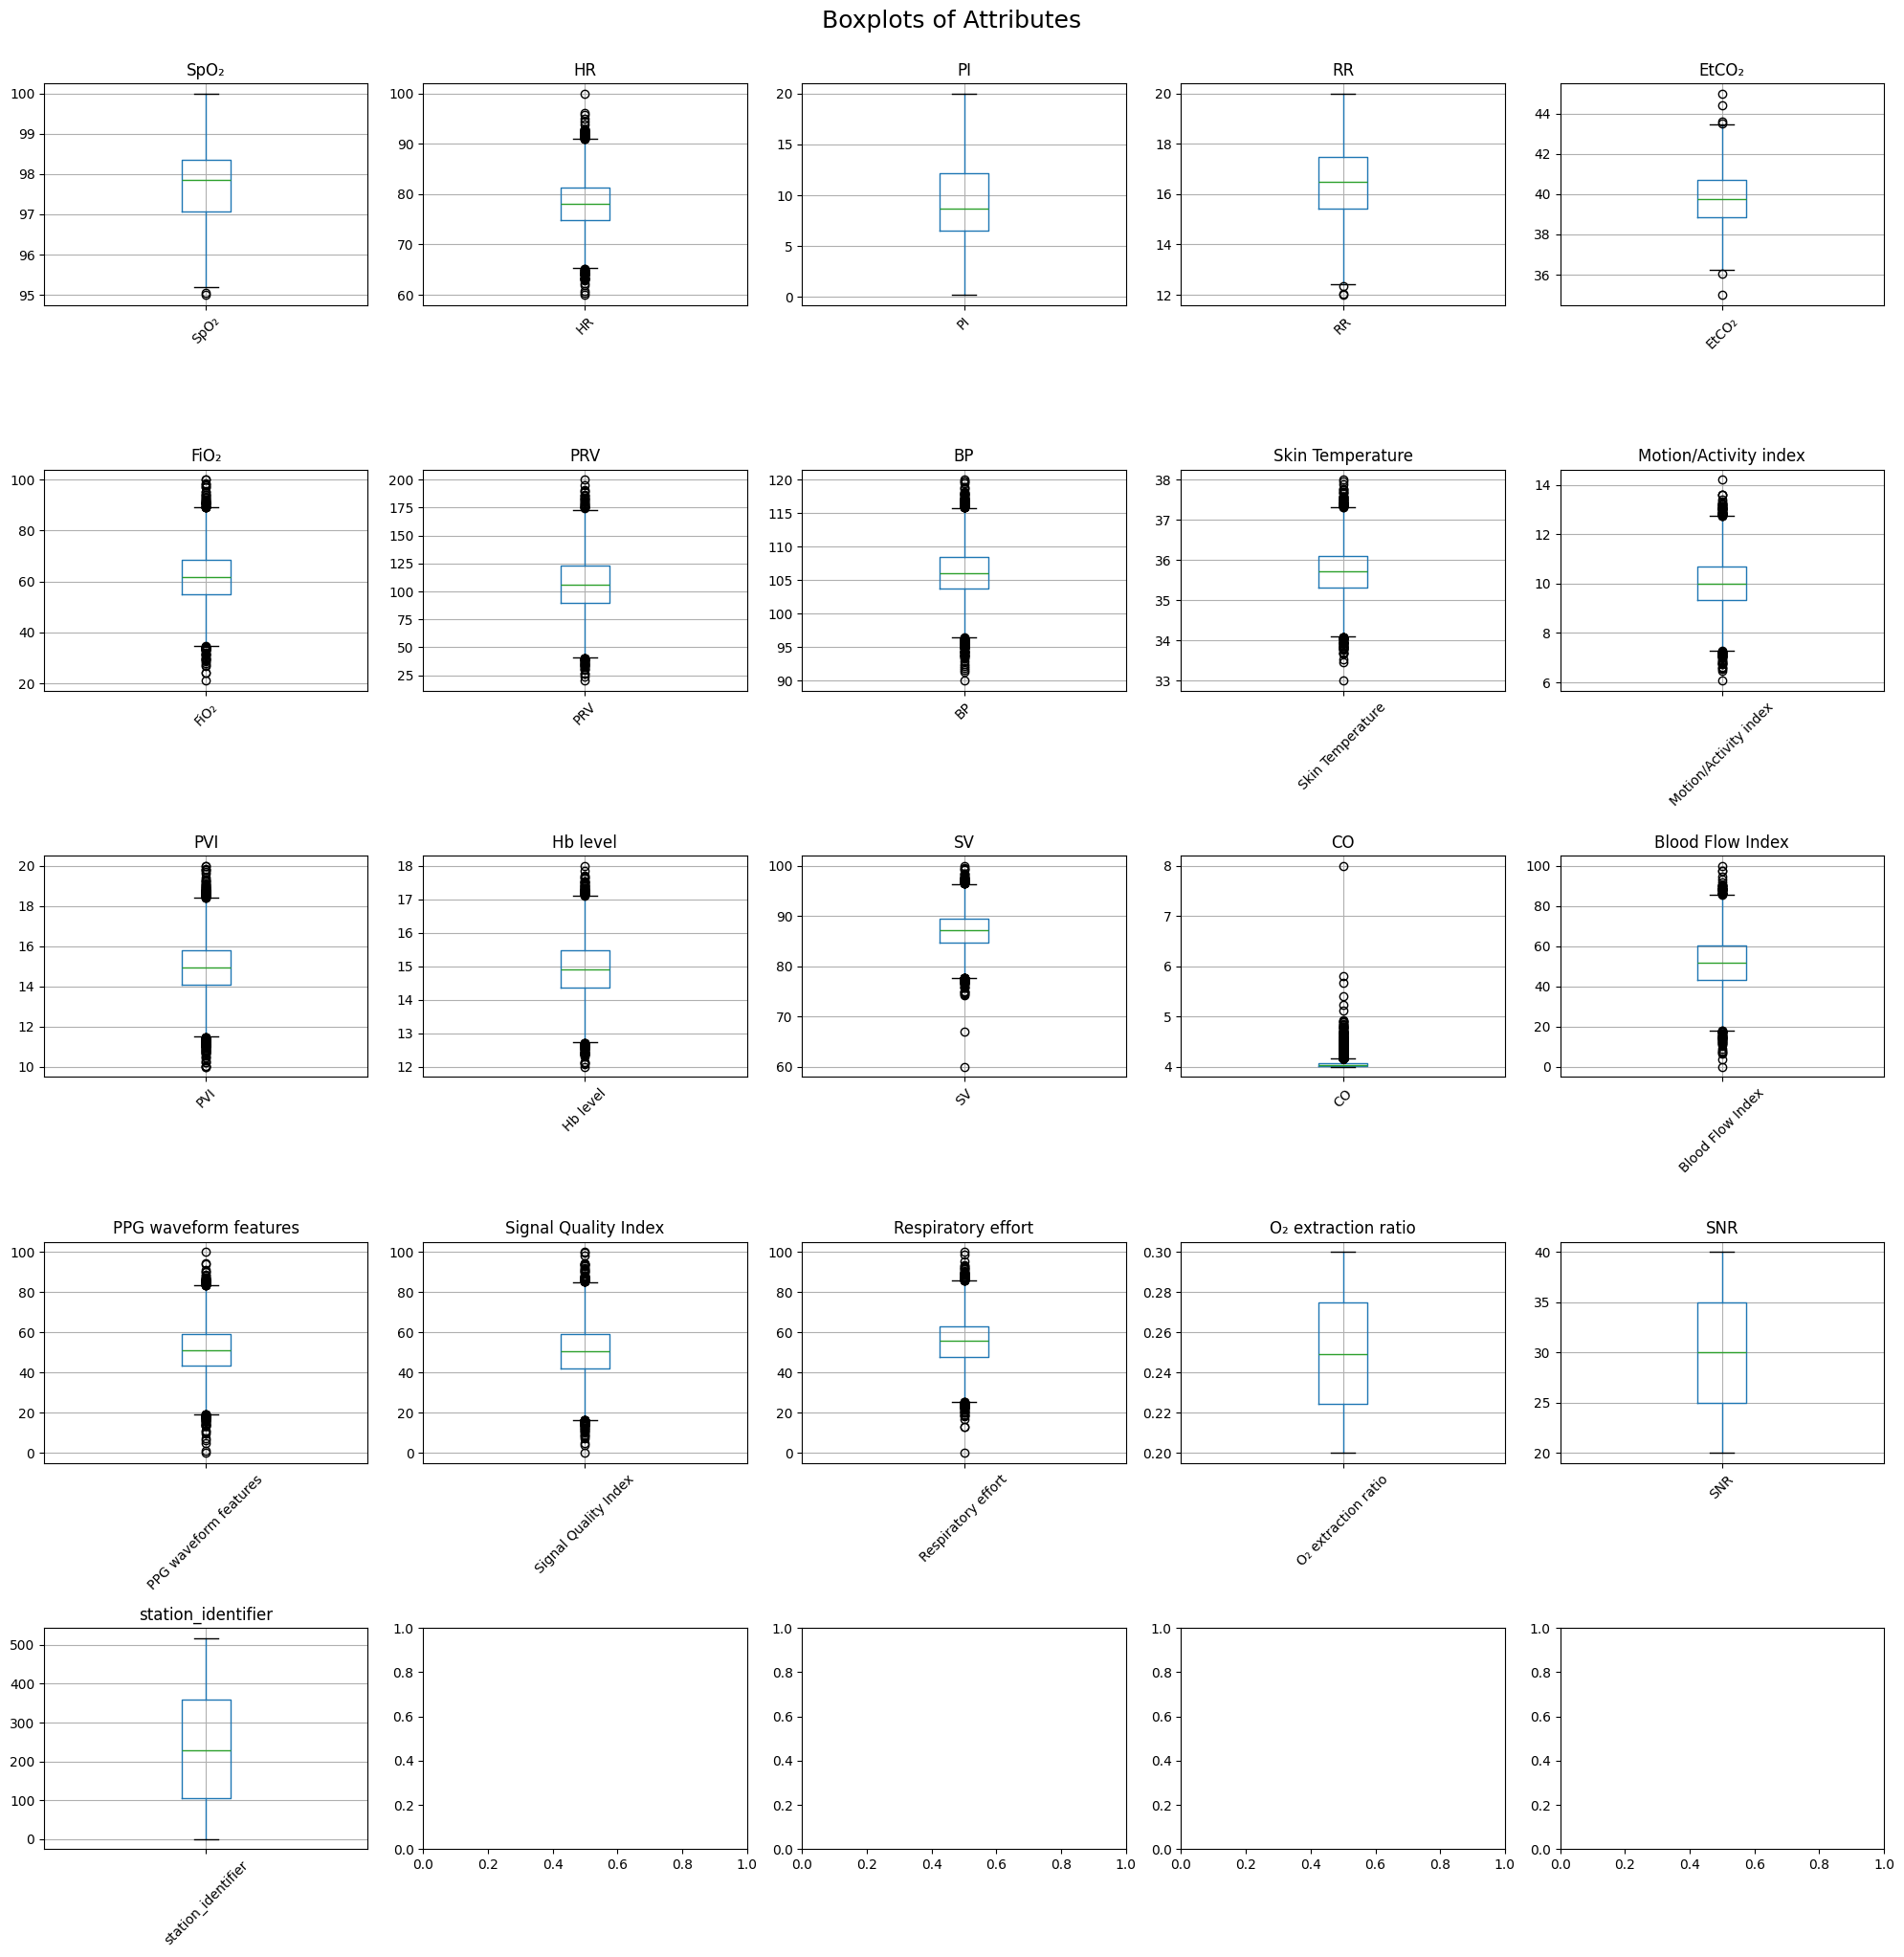

In [58]:
numeric_cols = observation.select_dtypes(include=["float64", "int64"]) #vpodstate vse
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    numeric_cols.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Boxplots of Attributes", fontsize=18, y=1.02)
plt.show()

We have displayed boxplot showing us outlier os every parameter inside of observation dataset.
This diagram was already shown before in the section 1.1.C, but we show it here once again to provide quick look at the outliers.

 Total number of potential outliers (3σ rule): 636


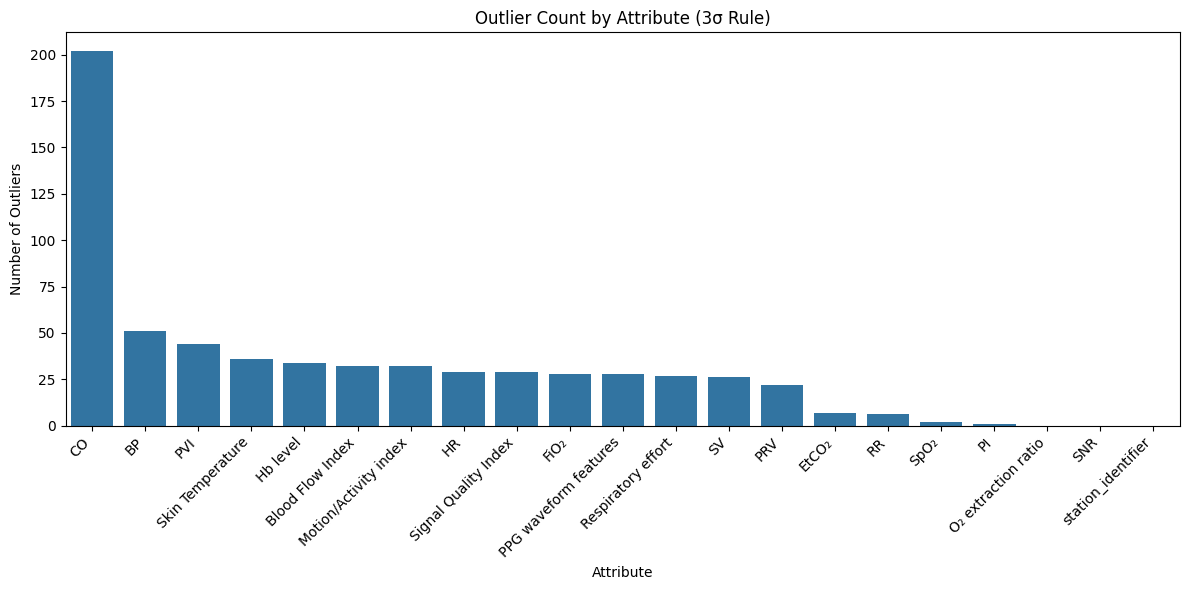

,Outliers
CO,202
BP,51
PVI,44
Skin Temperature,36
Hb level,34
Blood Flow Index,32
Motion/Activity index,32
HR,29
Signal Quality Index,29
FiO₂,28


In [69]:
numeric_cols = observation.select_dtypes(include=np.number).columns
outlier_counts_std = {}

for col in numeric_cols:
    data = observation[col].dropna()
    mean_val, std_val = data.mean(), data.std()
    lower, upper = mean_val - 3*std_val, mean_val + 3*std_val
    
    outliers = data[(data < lower) | (data > upper)]
    outlier_counts_std[col] = len(outliers)

outlier_df_std = pd.DataFrame.from_dict(outlier_counts_std, orient='index', columns=['Outliers'])
outlier_df_std = outlier_df_std.sort_values('Outliers', ascending=False)

total_outliers_std = outlier_df_std['Outliers'].sum()

print(f" Total number of potential outliers (3σ rule): {total_outliers_std}")

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=outlier_df_std.index, y=outlier_df_std['Outliers'])
plt.xticks(rotation=45, ha='right')
plt.title('Outlier Count by Attribute (3σ Rule)')
plt.ylabel('Number of Outliers')
plt.xlabel('Attribute')
plt.tight_layout()
plt.show()

display(outlier_df_std)

Here we used the 3σ rule to find data points that are more than three standard deviations away from the mean. This helps spot values that are unusually high or low compared to the rest. We found 636 potential outliers, mostly in CO, BP, and PVI, which means these variables vary the most. This gives us a first idea of where extreme or abnormal readings appear in the dataset.

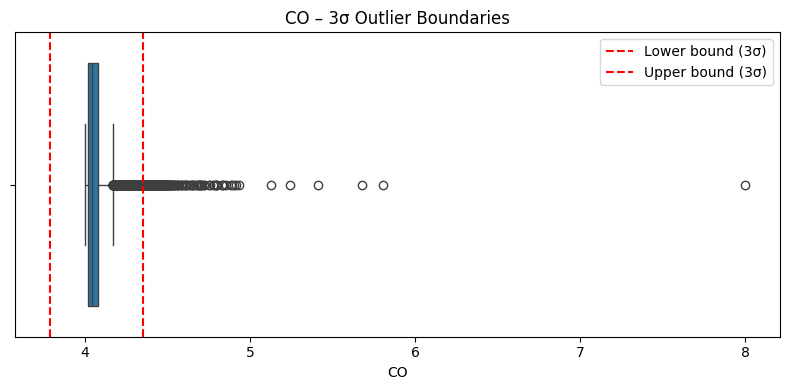

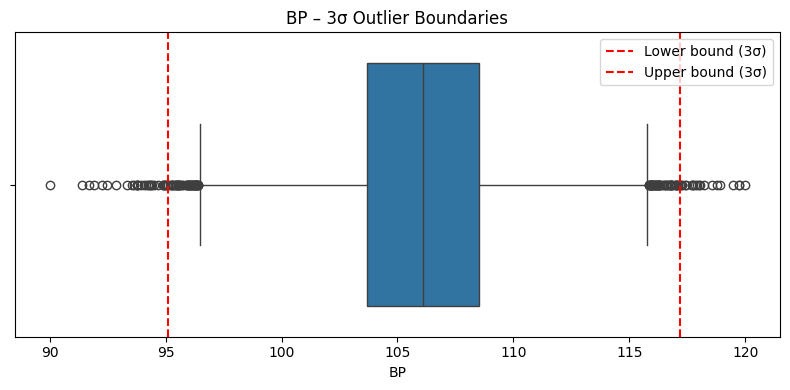

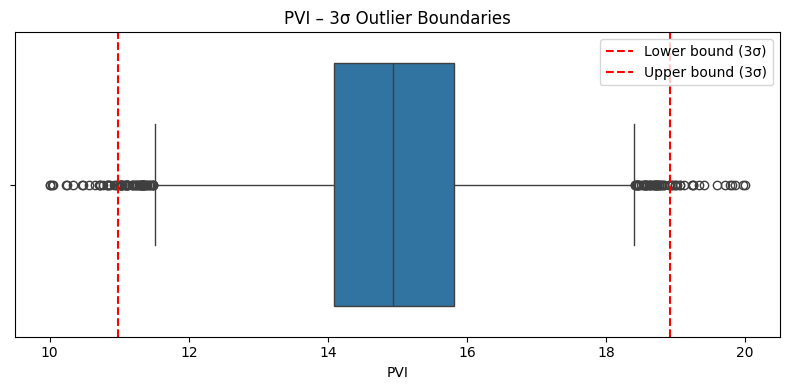

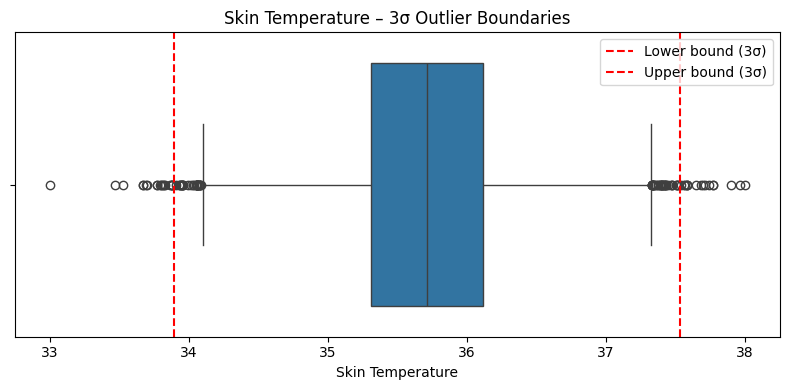

In [67]:
top_std_cols = outlier_df_std.head(4).index

for col in top_std_cols:
    data = observation[col].dropna()
    mean_val, std_val = data.mean(), data.std()
    lower, upper = mean_val - 3*std_val, mean_val + 3*std_val

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data)
    plt.axvline(lower, color='red', linestyle='--', label='Lower bound (3σ)')
    plt.axvline(upper, color='red', linestyle='--', label='Upper bound (3σ)')
    plt.title(f'{col} – 3σ Outlier Boundaries')
    plt.legend()
    plt.tight_layout()
    plt.show()

Here we have used boxplots to visualize attributes with the most outliers. The plots for CO, BP, and PVI confirmed that these parameters have many extreme values, showing strong variability or possible measurement issues. This step helped us confirm the statistical results visually.

 Total number of potential outliers (IQR method): 2188


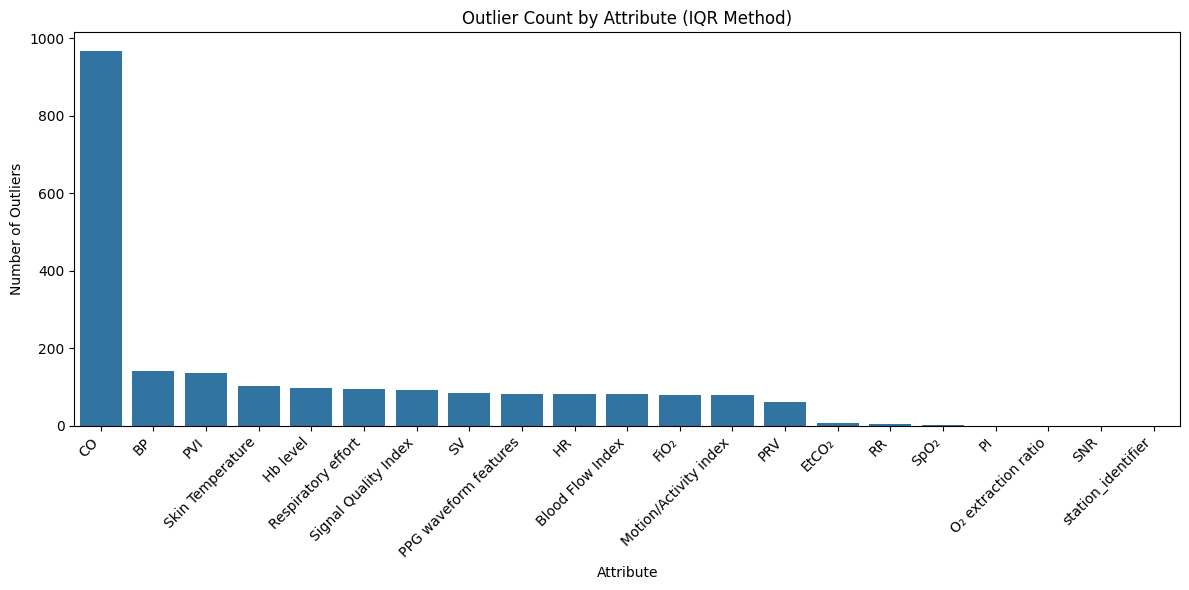

,Outliers
CO,967
BP,142
PVI,137
Skin Temperature,101
Hb level,98
Respiratory effort,94
Signal Quality Index,91
SV,83
PPG waveform features,82
HR,82


In [72]:
outlier_counts_iqr = {}

for col in numeric_cols:
    data = observation[col].dropna()
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower, upper = q25 - 1.5 * iqr, q75 + 1.5 * iqr
    
    outliers = data[(data < lower) | (data > upper)]
    outlier_counts_iqr[col] = len(outliers)

outlier_df_iqr = pd.DataFrame.from_dict(outlier_counts_iqr, orient='index', columns=['Outliers'])
outlier_df_iqr = outlier_df_iqr.sort_values('Outliers', ascending=False)

total_outliers_iqr = outlier_df_iqr['Outliers'].sum()

print(f" Total number of potential outliers (IQR method): {total_outliers_iqr}")

plt.figure(figsize=(12,6))
sns.barplot(x=outlier_df_iqr.index, y=outlier_df_iqr['Outliers'])
plt.xticks(rotation=45, ha='right')
plt.title('Outlier Count by Attribute (IQR Method)')
plt.ylabel('Number of Outliers')
plt.xlabel('Attribute')
plt.tight_layout()
plt.show()

display(outlier_df_iqr)

The IQR method was used next because it works better for data that isn’t perfectly normal. It looks for values that are too far from the middle 50% of the data. This method found 2,188 outliers, again mostly in CO, BP, and PVI, but also in Skin Temperature and Hb level. The higher count means the IQR method is more sensitive to extreme values.

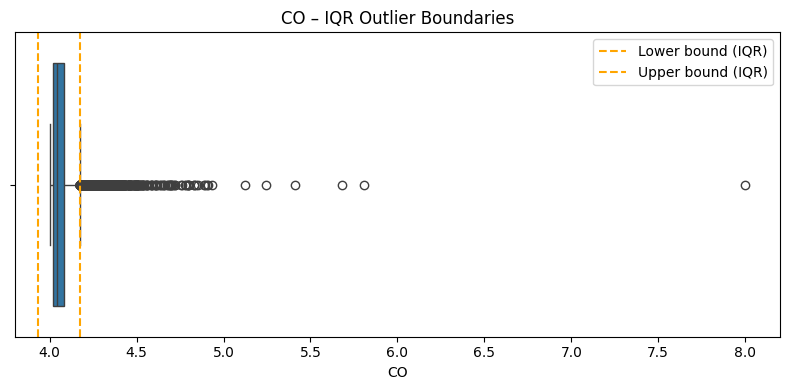

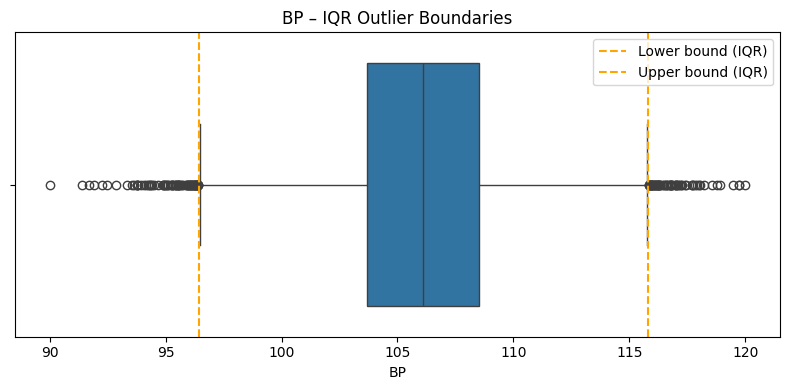

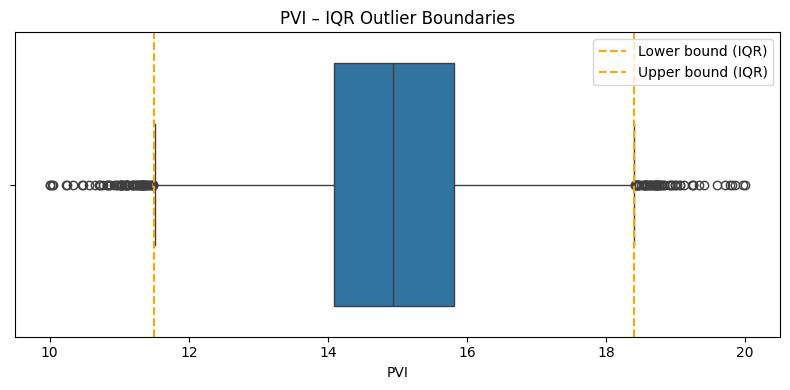

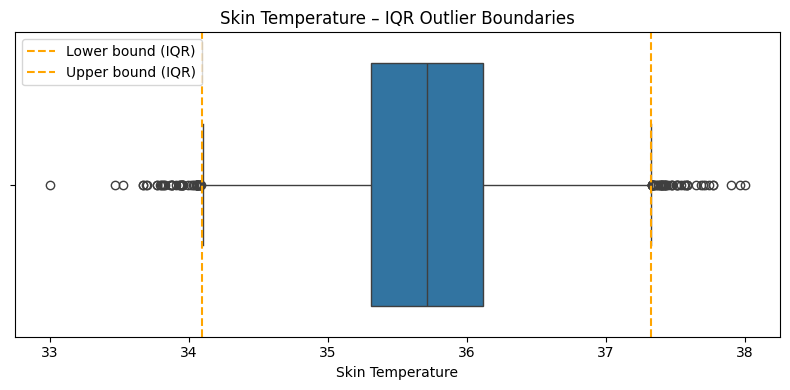

In [73]:
top_iqr_cols = outlier_df_iqr.head(4).index

for col in top_iqr_cols:
    data = observation[col].dropna()
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    lower, upper = q25 - 1.5 * iqr, q75 + 1.5 * iqr

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data)
    plt.axvline(lower, color='orange', linestyle='--', label='Lower bound (IQR)')
    plt.axvline(upper, color='orange', linestyle='--', label='Upper bound (IQR)')
    plt.title(f'{col} – IQR Outlier Boundaries')
    plt.legend()
    plt.tight_layout()
    plt.show()

Finally, we plotted boxplots for the variables with the most outliers based on the IQR rule. They clearly show that CO, BP, and PVI have a lot of data points outside the normal range. This confirms what we saw earlier — these attributes show big differences between patients or possible sensor noise.

To summarize, we used two different statistical methods — the 3σ rule and the IQR method — to identify potential outliers in the dataset.
We visualized the results using boxplots, which helped highlight variables such as CO, BP, and PVI, where extreme values were most common.
Both methods detected several potential outliers, after comparing the results with the acceptable measurement ranges, we concluded that all detected values still fall within realistic physiological limits.
Therefore, no data points were removed or replaced, as these values likely represent valid but rare observations rather than measurement errors.

## 1.3 Formulation and statistical verification of hypotheses about the data

### A - Hypotheses

Formulate two hypotheses about the data in the context of the given prediction task. Verify the formulated hypotheses using appropriately chosen statistical tests.
Example formulation:
“FiO₂ has a higher average value in the state with oximetry than without it.”

#### Hypothesis 1

Text of the hypothesis

Test comment

In [52]:
# code

Comment

#### Hypothesis 2

Text of the hypothesis

Test comment

In [53]:
# code

Comment

### B - Statistical power

Verify whether your statistical tests have sufficient support from the data — that is, whether they have enough statistical power.

#### Hypothesis 1

Comment

In [54]:
# code

#### Hypothesis 2

Comment

In [55]:
# code

# Conclusion